# Problem Statement:
### Business case:
- Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem. In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

### Predict : Insurace claims is fraud or not.

# Importing Libraries and dataset

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# importing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# create dataframe
fraud = pd.read_csv("fraud.csv")

In [4]:
# check the first 5 records of the dataframe
fraud.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [5]:
# chech the shape of the dataframe
fraud.shape

(1000, 40)

#### There are 1000 records and 40 columns

In [134]:
fraud.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

 - Drop the _c39 column it has only null values

In [6]:
fraud = fraud.drop("_c39", axis=1)

In [7]:
fraud.shape

(1000, 39)

- Replacing ? with nan

In [8]:
fraud = fraud.replace("?", np.nan)

### check for null values

In [9]:
fraud.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [139]:
fraud.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                     NaN               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

### Check for unique values

In [10]:
for x in fraud.columns:
    print(fraud[x].unique())

[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309 396 273 419 315  7

In [11]:
fraud["incident_location"]

0           9935 4th Drive
1             6608 MLK Hwy
2        7121 Francis Lane
3         6956 Maple Drive
4             3041 3rd Ave
              ...         
995     6045 Andromedia St
996       3092 Texas Drive
997            7629 5th St
998          6128 Elm Lane
999    1416 Cherokee Ridge
Name: incident_location, Length: 1000, dtype: object

# Identify the problem : Classification

In [12]:
fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [13]:
fraud['policy_bind_date'] = pd.to_datetime(fraud['policy_bind_date'])
fraud['incident_date'] = pd.to_datetime(fraud['incident_date'])

### Incident location is a unique column and might to impact the prediction and hence dropping the column

In [14]:
fraud = fraud.drop('incident_location', axis=1)

#### Observation:

##### Target - Categorical variable
- Since, the target variable is a categorical variable we will use the classification model to predict the outcome
### Supervised/classification model

# Exploratory Data Analysis and Data Cleaning

#### Finding the Categorical variables

In [15]:
obj = []
for x in fraud.columns:
    if fraud[x].dtypes == "object":
        obj.append(x)

In [16]:
obj

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

#### Univariate analysis

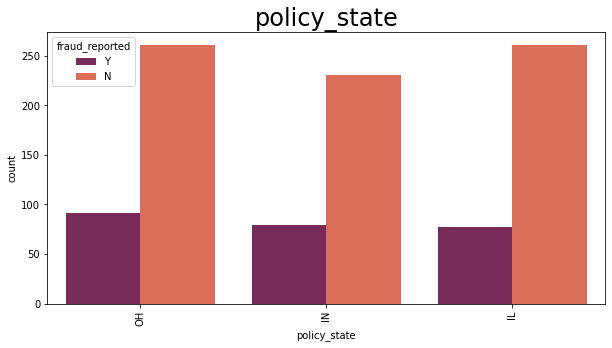

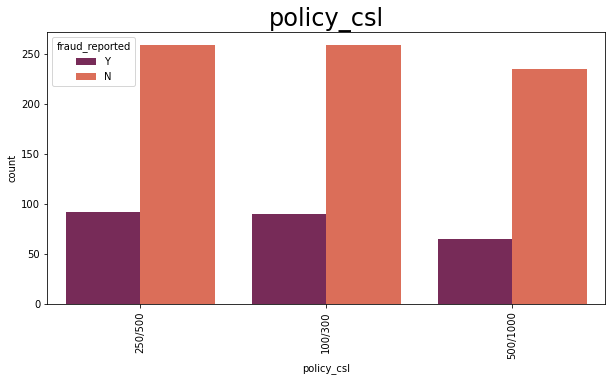

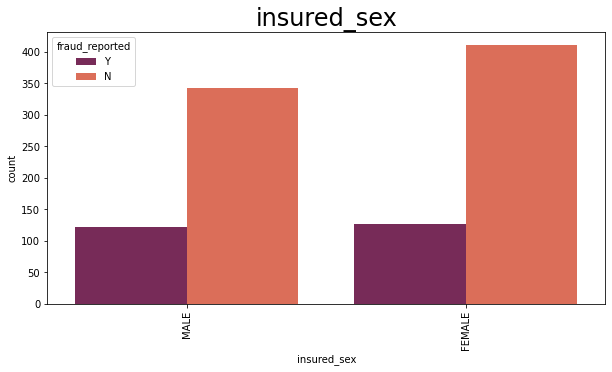

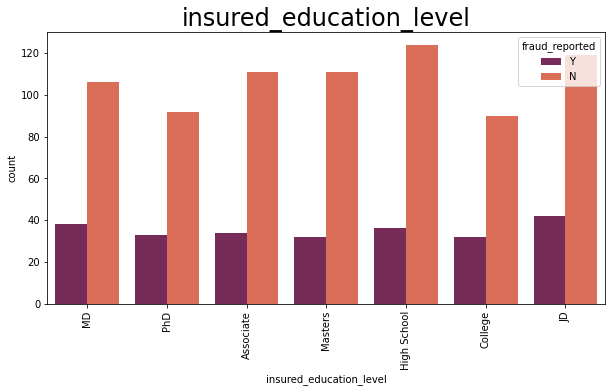

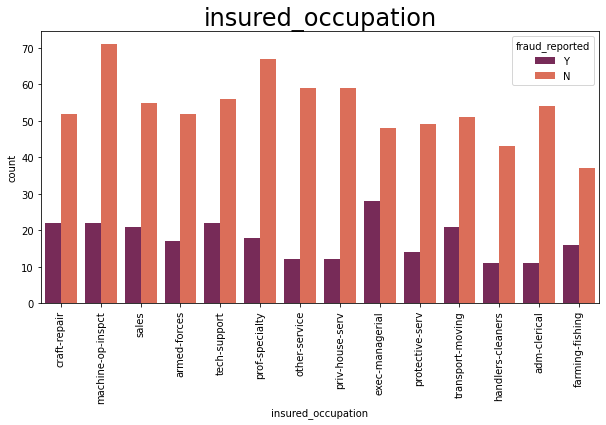

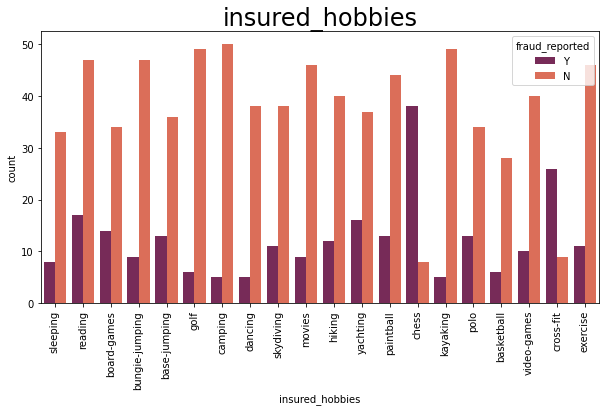

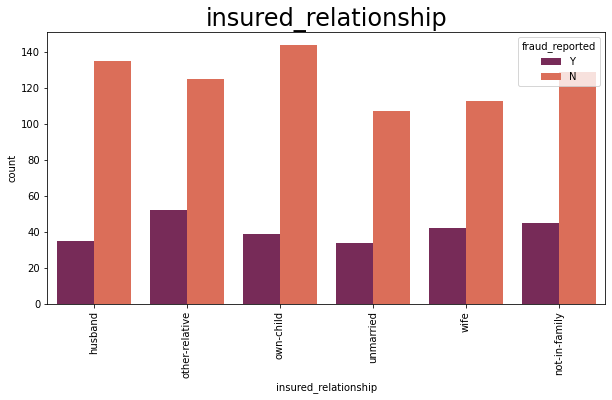

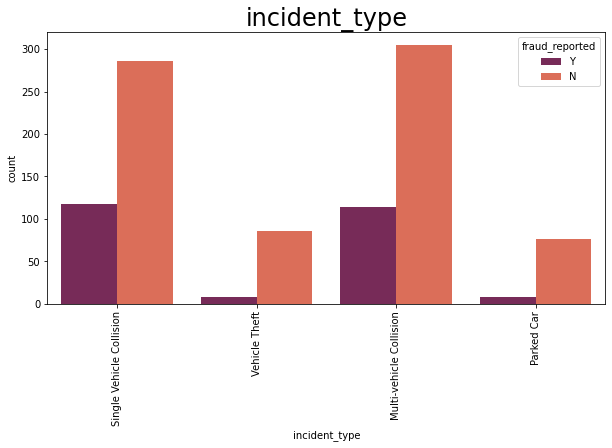

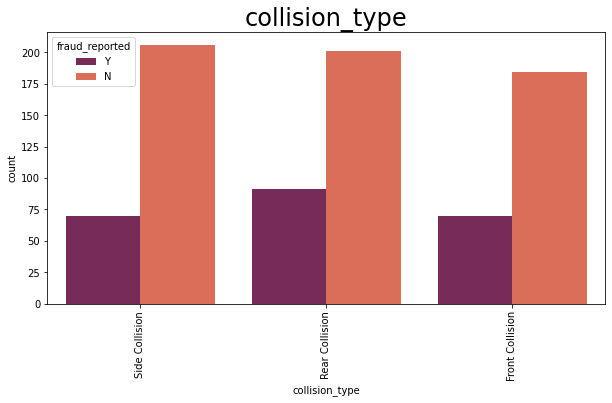

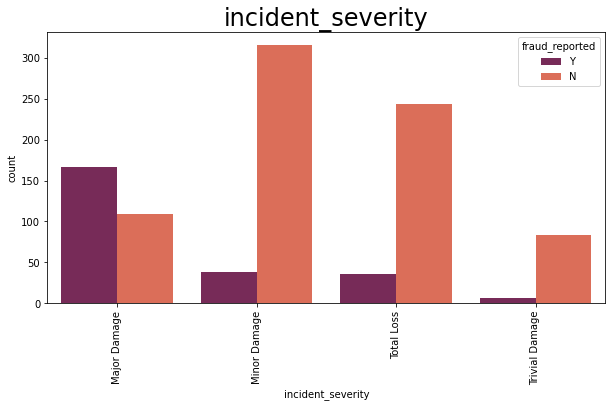

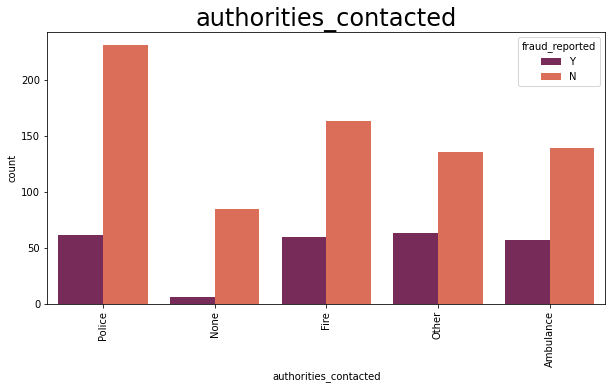

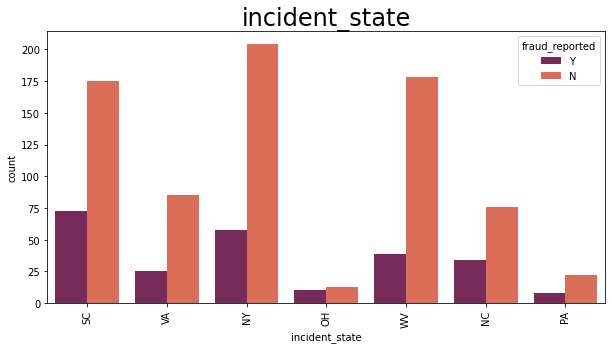

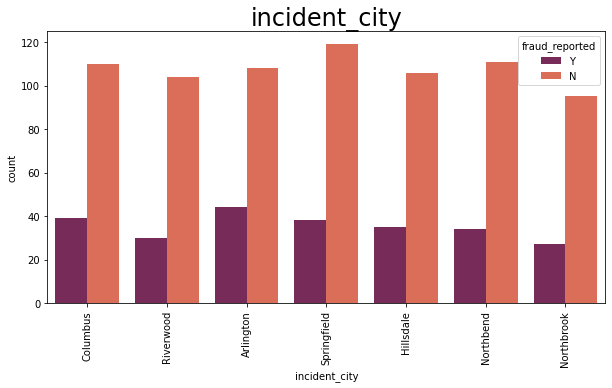

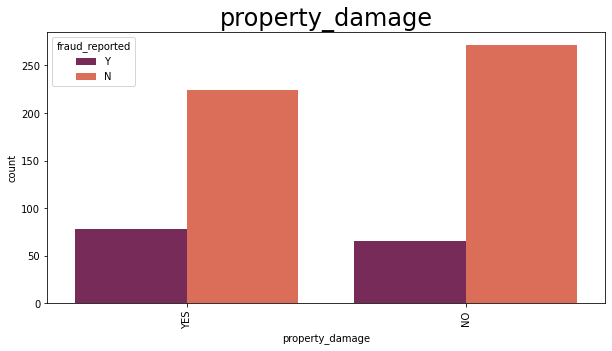

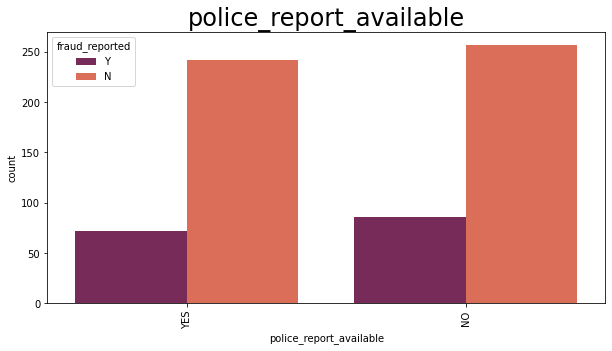

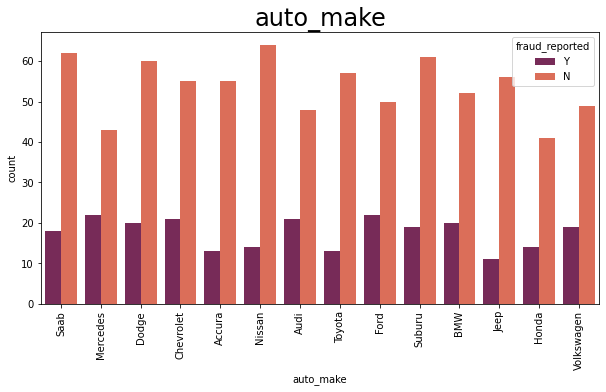

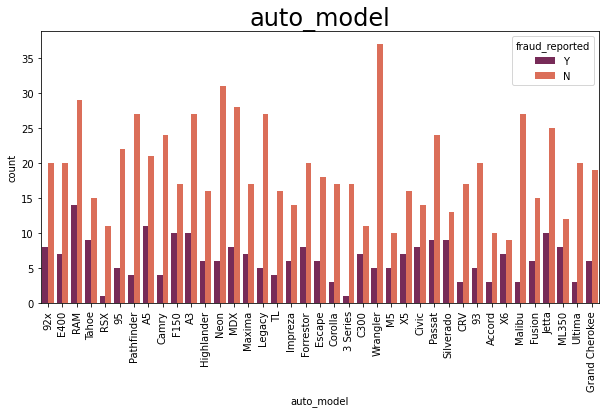

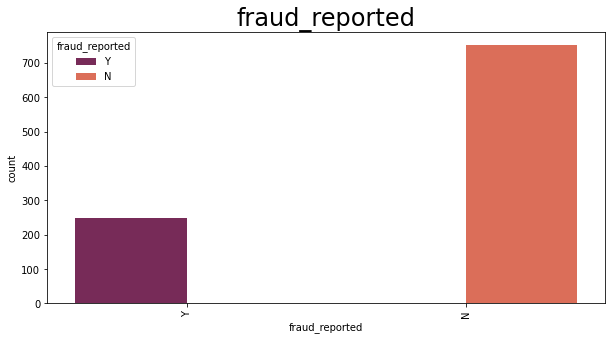

In [59]:
for i in obj:
    fig_size = (10,5)
    fig, ax = plt.subplots(figsize = fig_size)
    sns.countplot(data=fraud, x=i, hue="fraud_reported", palette="rocket" )
    plt.xticks(rotation=90)
    plt.title(i, fontsize = 24)
    
    

#### Observation:

1. policy_state : 
   - The count plot shws that, state IL has lowest count of frauds ad state OH has highest count of fraud reported
2. policy_csl:
   - people with a score of 250/500 and 100/300 are the highest in the population and have the highet fraudulent claim count.
3. insured_sex:
   - The female population has the highest count in the given data and they have highest fraudulent rate.
4. insured_education_level:
   - Customers with JD are considered to have higher fraudulent rate.
5. insured_occupation:
   - executive managers have highest fraud claim compared to other insured occupations.
6. insured_hobbies:
   - people who play chess have highest fraud claim followed by cross-fit in the second place 
   
7. insured_relationship:
   - customers claiming to have other relatives have highest fraud claim
8. incident_type:
   - Multi-vechicle collision and single vechicle collision have the highest fraud clain, whereas vechile theft and parked car have the lowest fraud claim
9. collision_type:
    - Rear collision have the highest fraud claim
10. incident_severity:
    - Majour Damage has the highest fraud claim
11. incident_state:
    - SC has the highest fraud claim
12. incident_city:
    - Arlington  has the highest fraud claim
13.  auto_make :
     - Mercedes, Audi, Chevrolet, Ford and BMW have the highest fraud claim
14. auto_model:
     - RAM has the highest fraud claim



In [17]:
num = []
for x in fraud.columns:
    if fraud[x].dtypes == "int64" or fraud[x].dtypes == "float64" :
        num.append(x)

In [ ]:
num.append('fraud_reported')

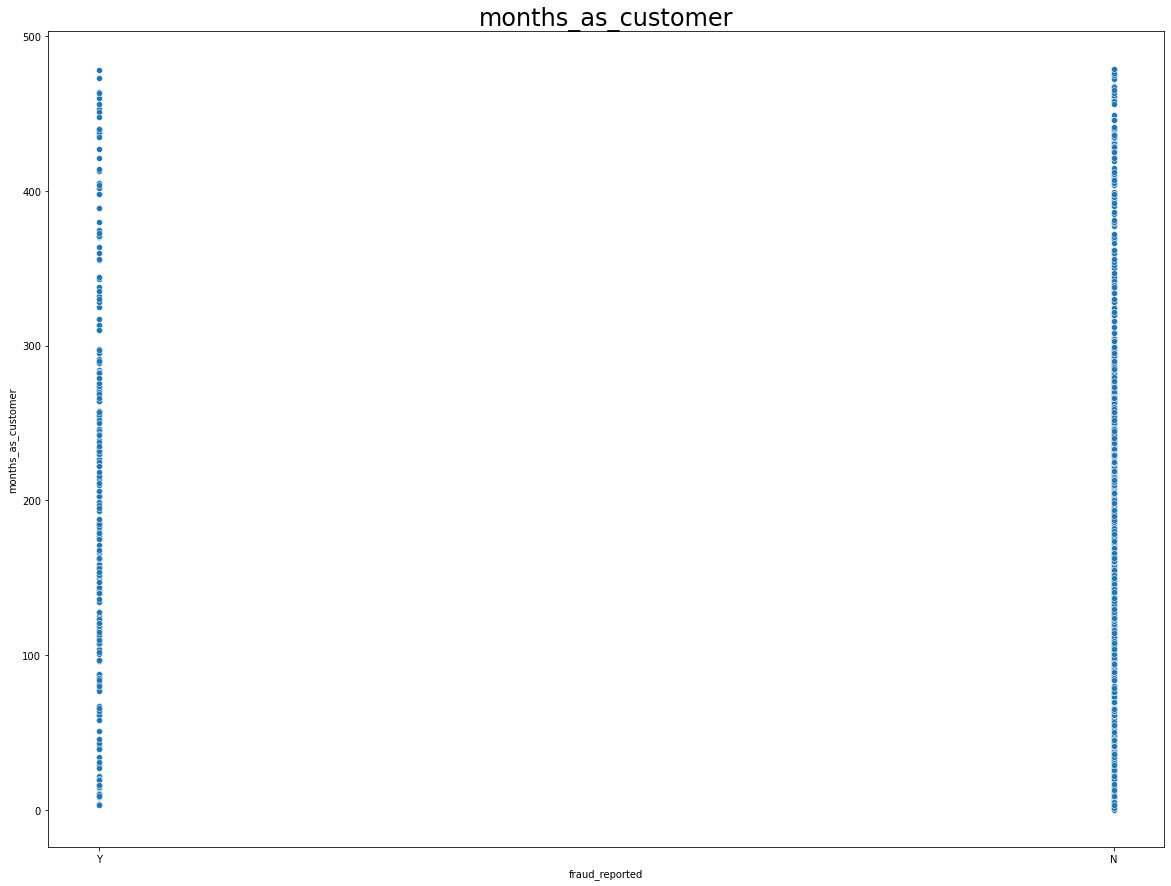

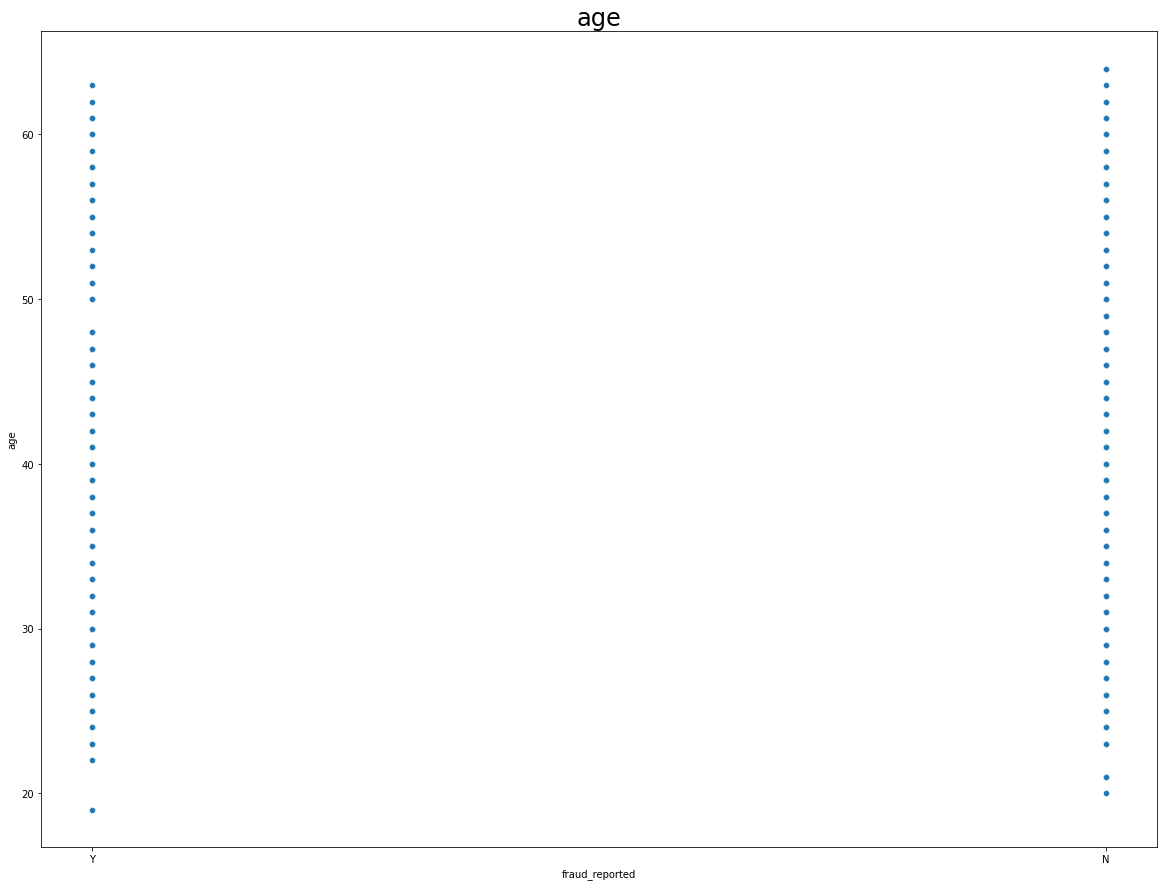

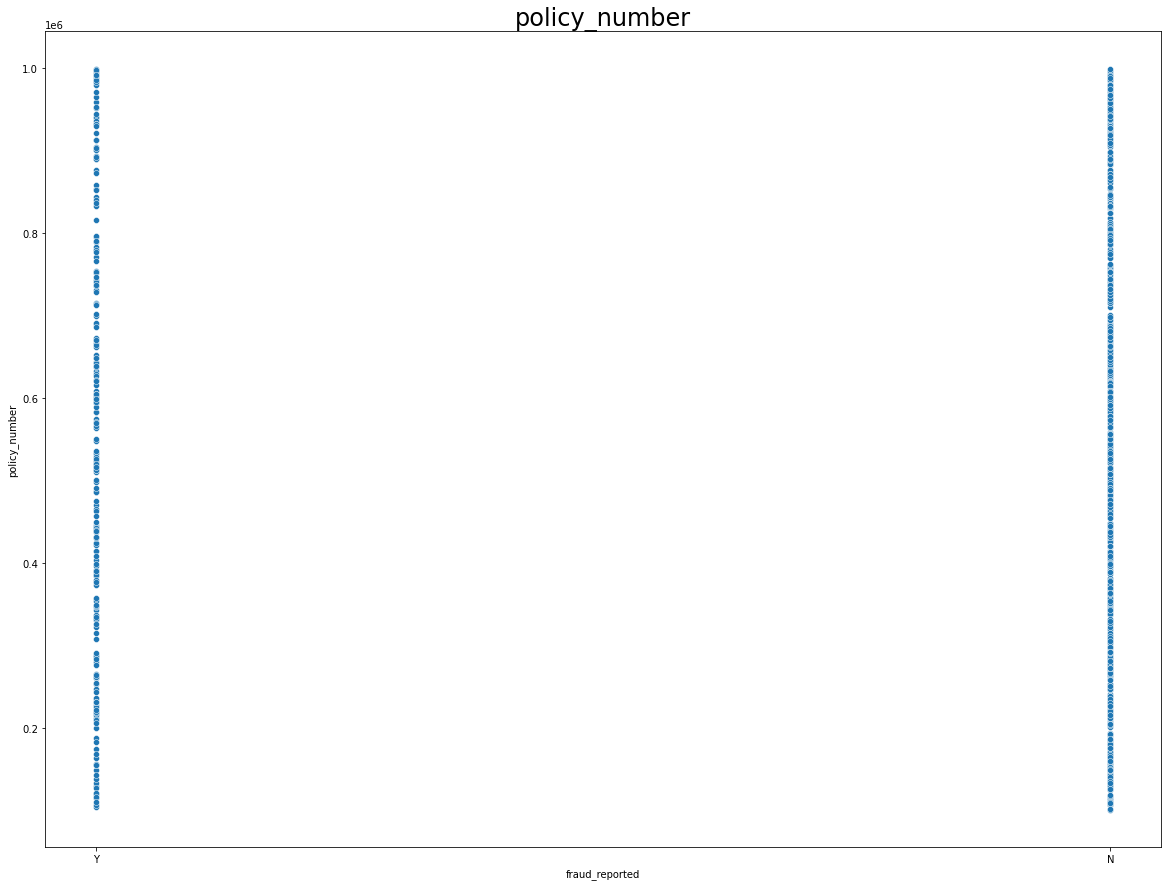

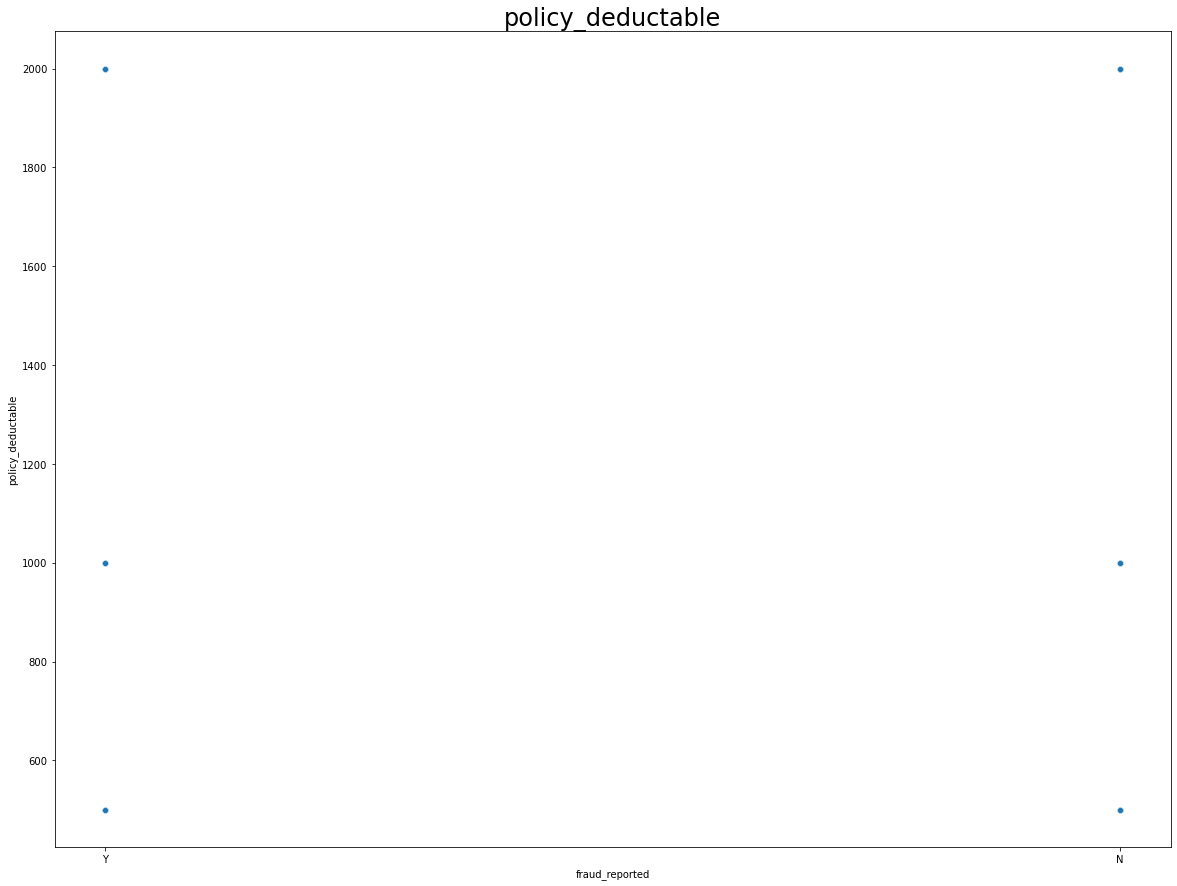

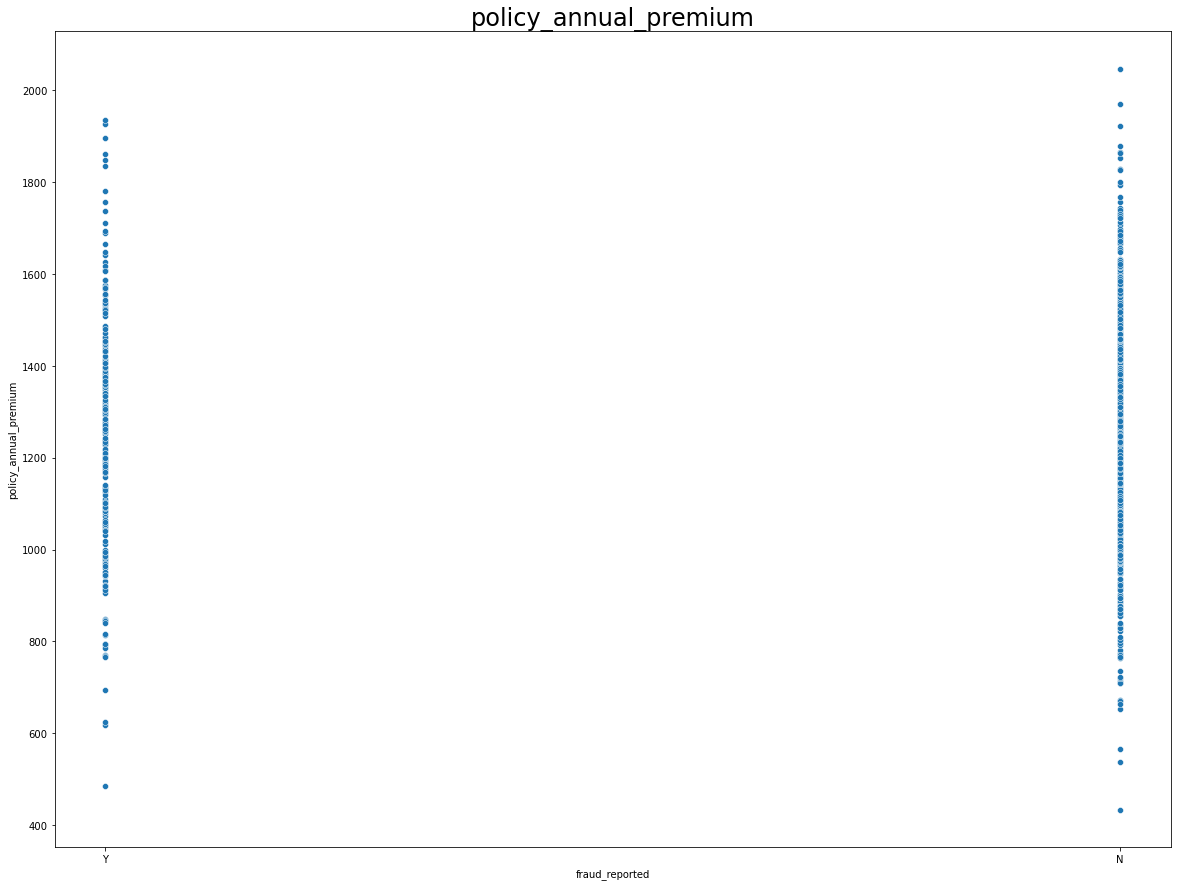

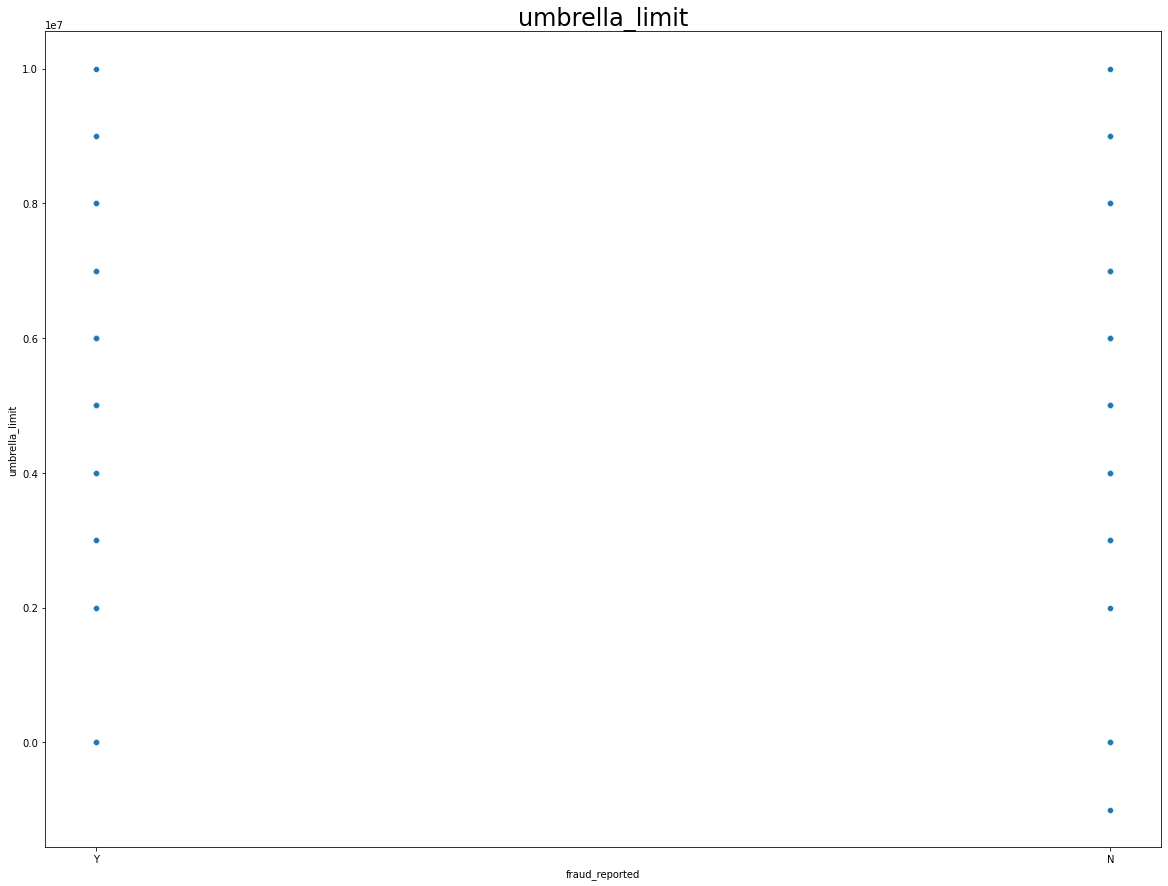

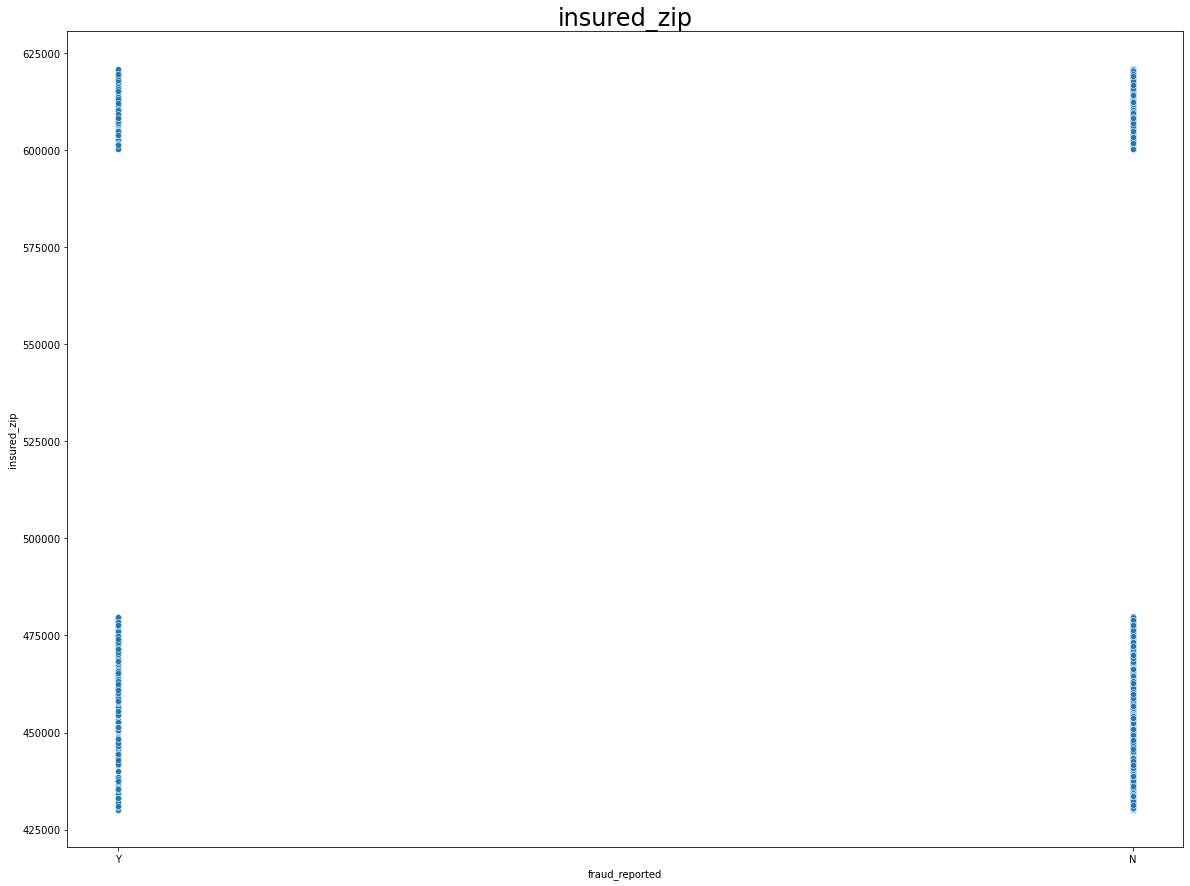

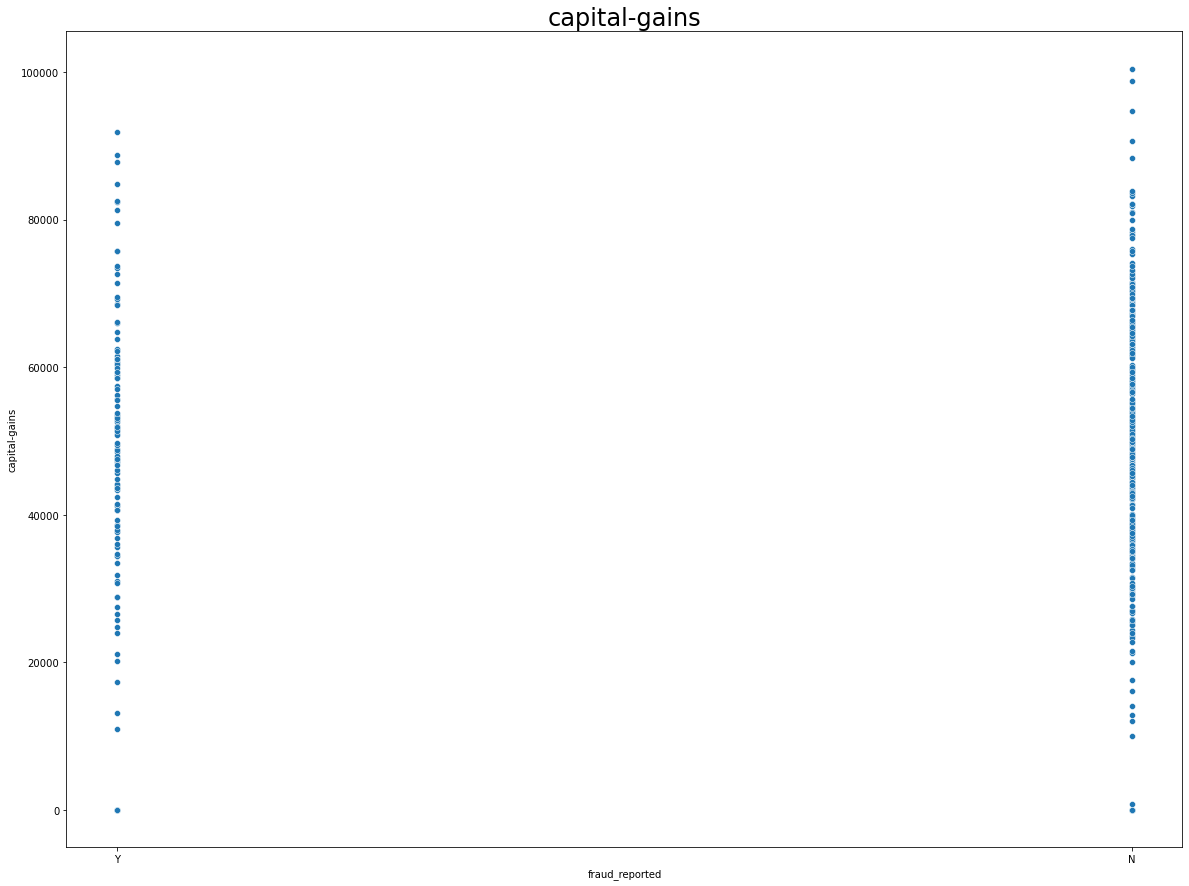

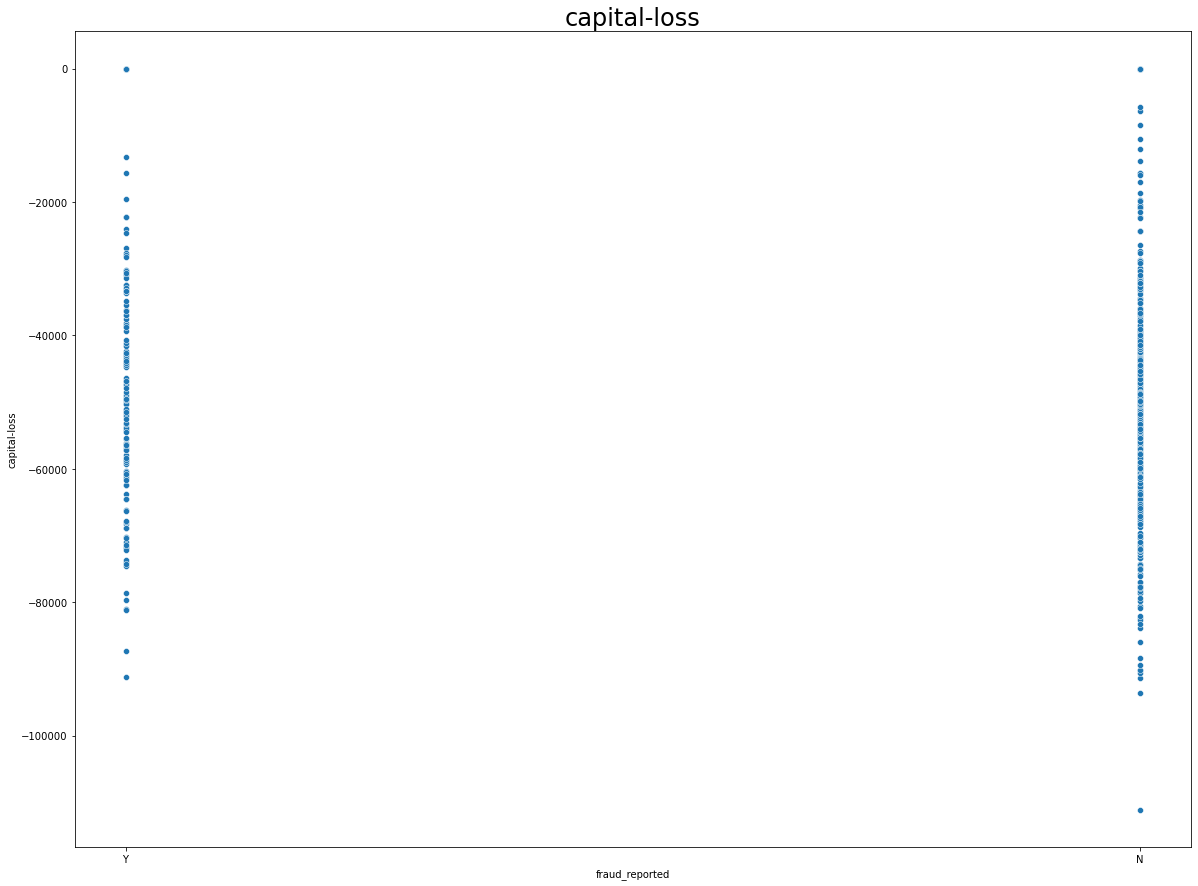

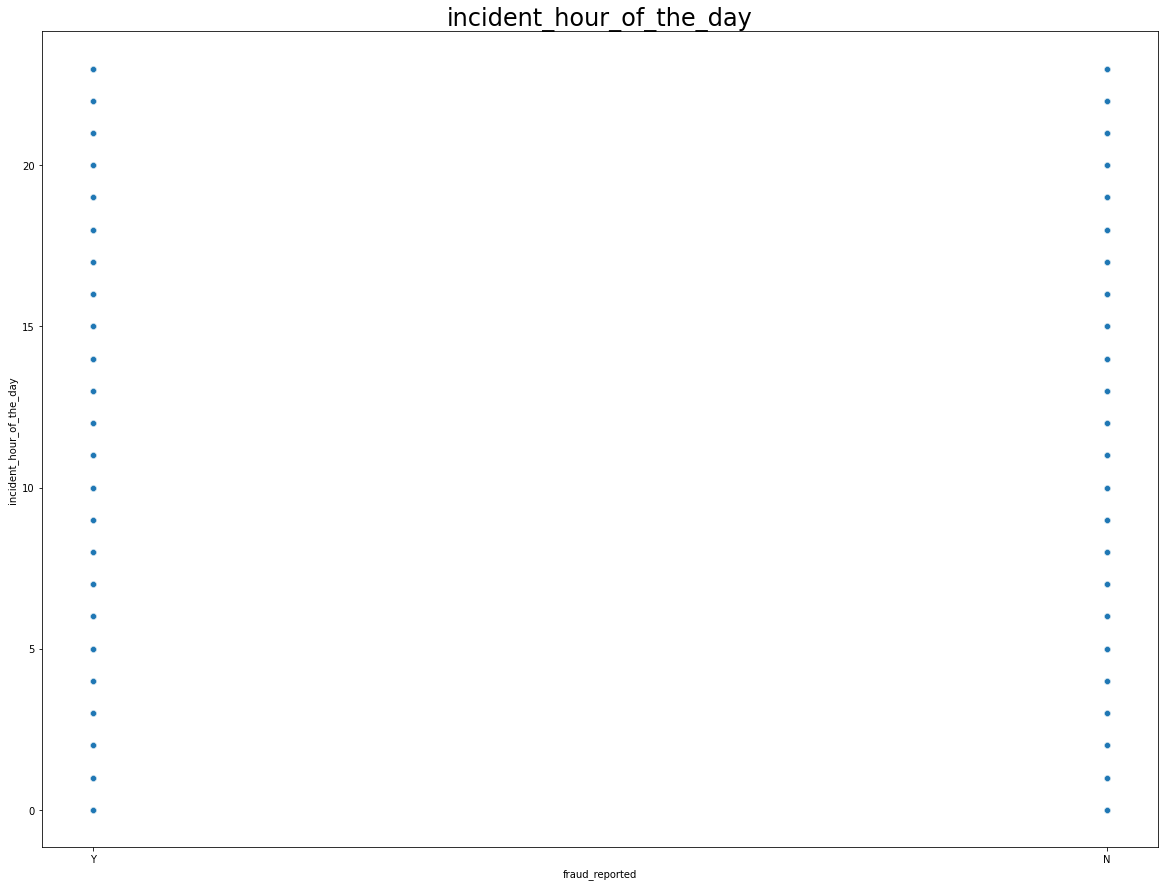

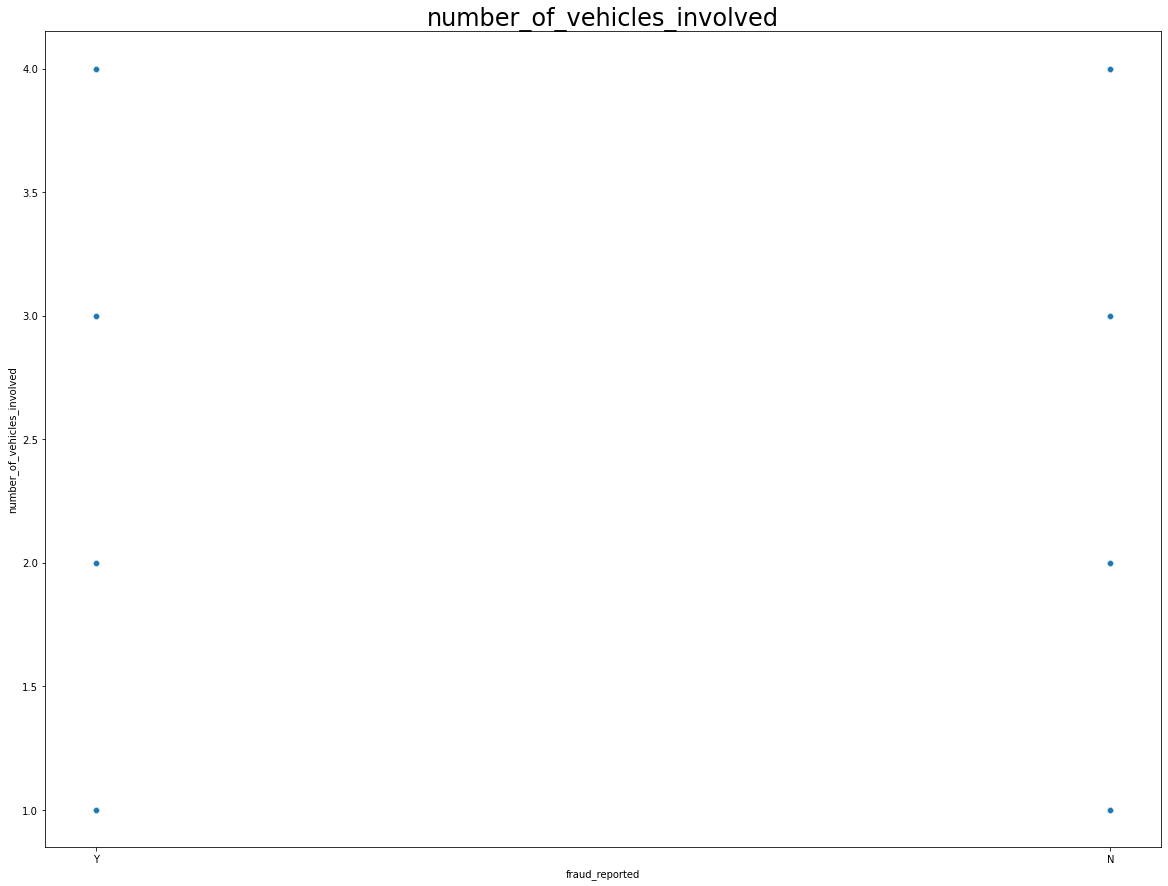

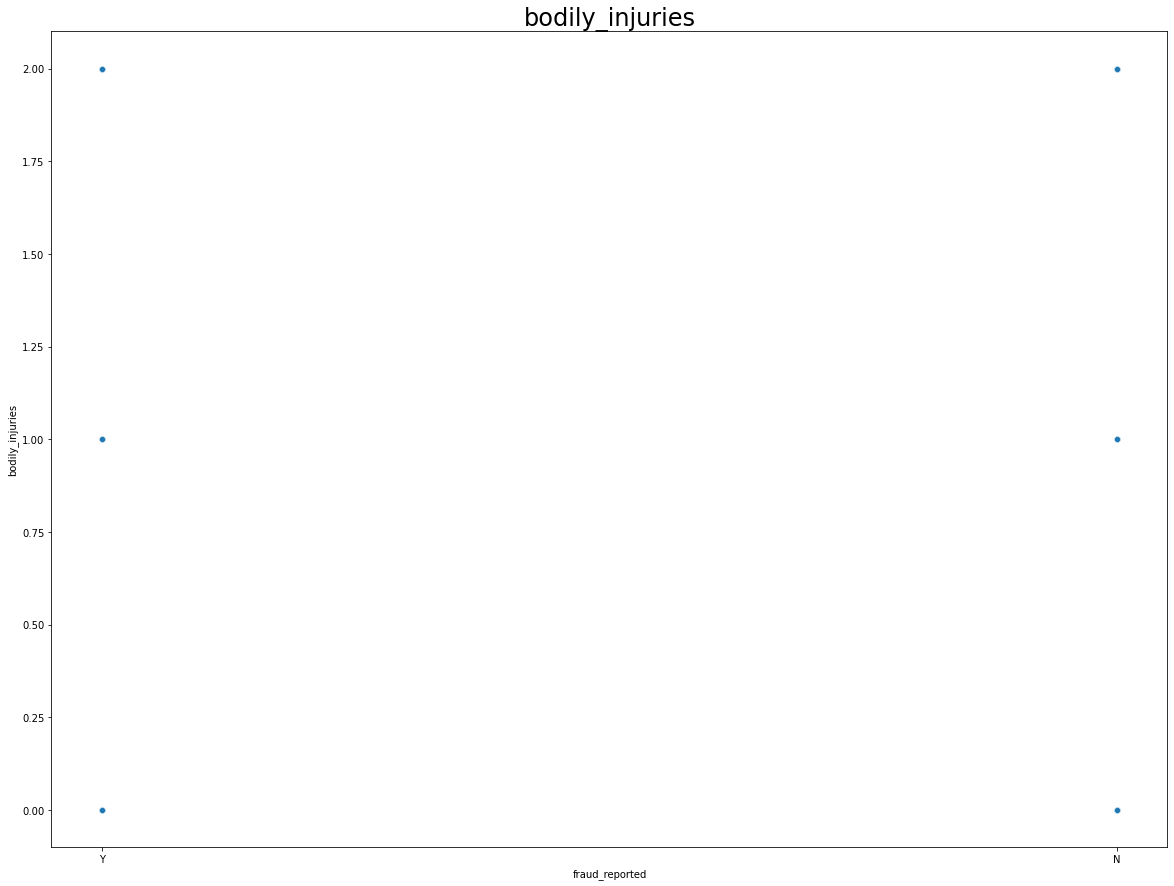

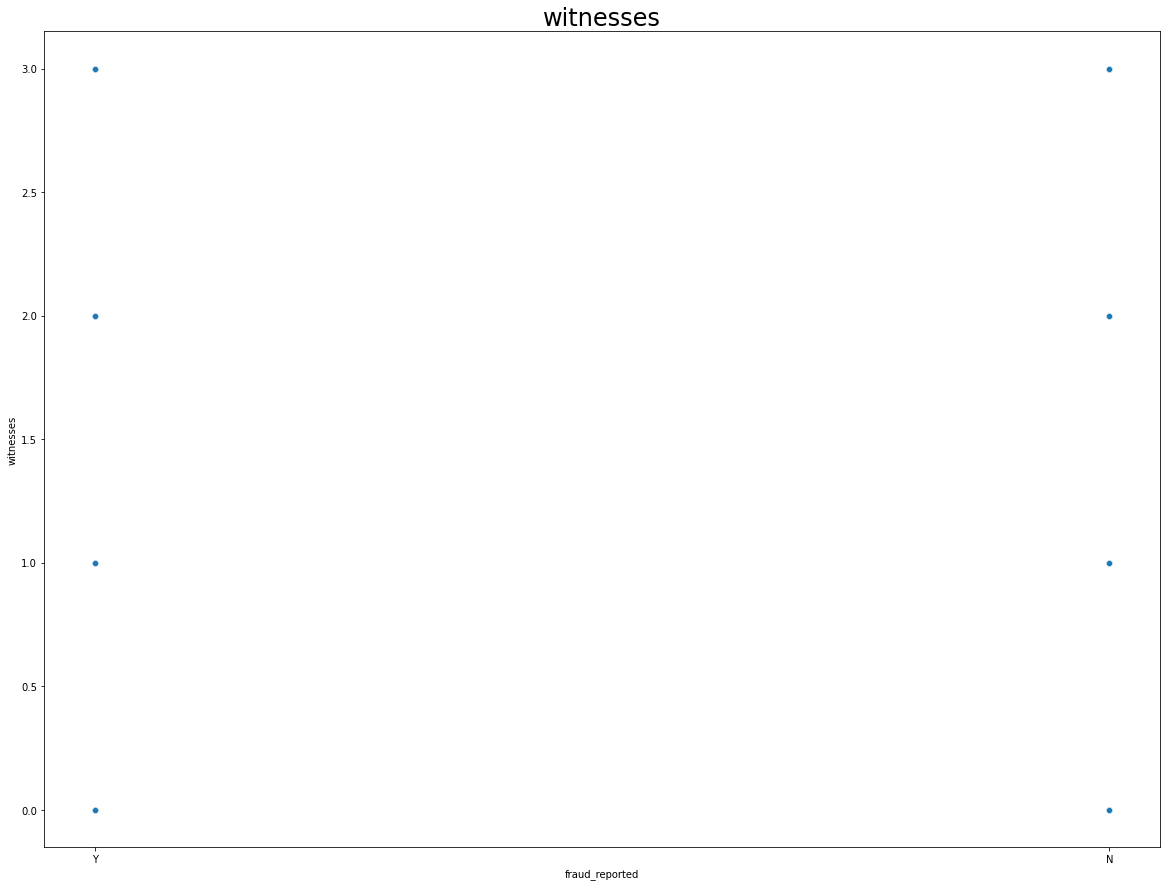

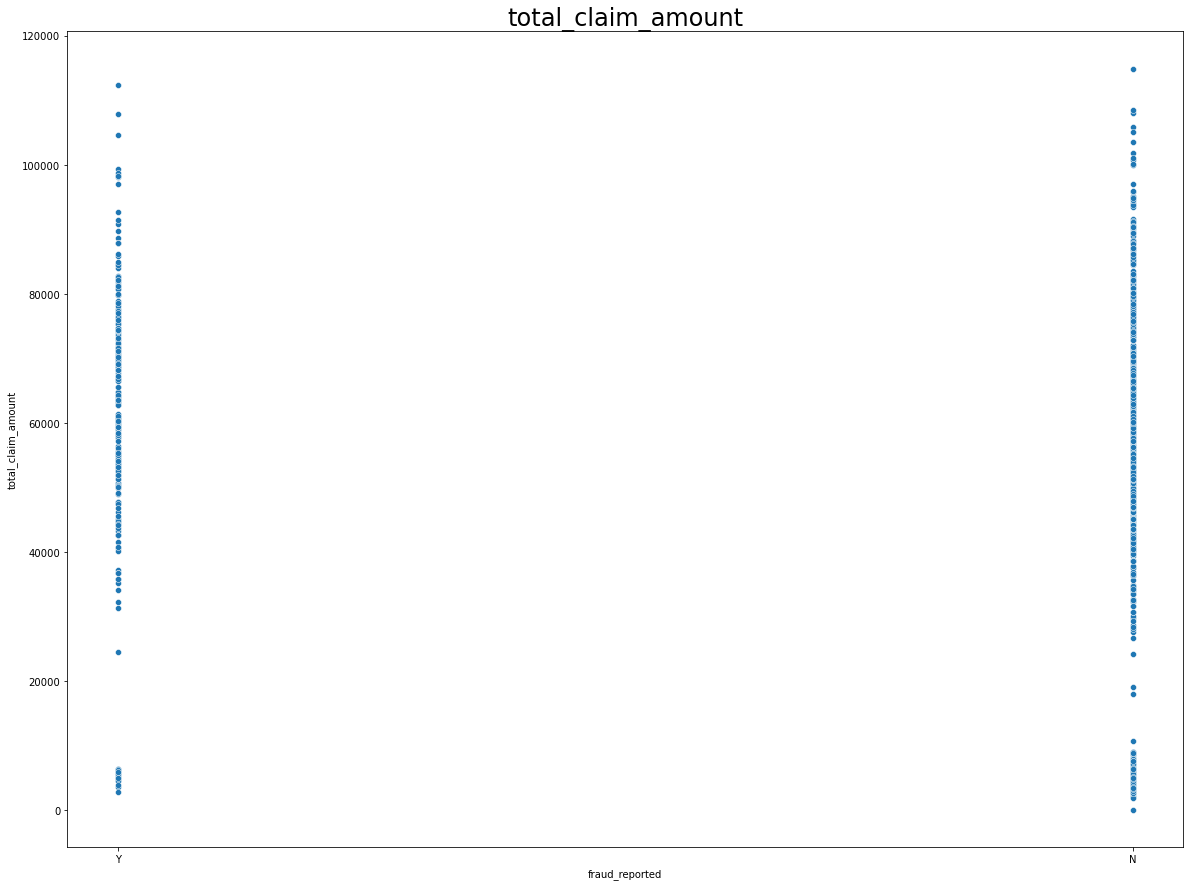

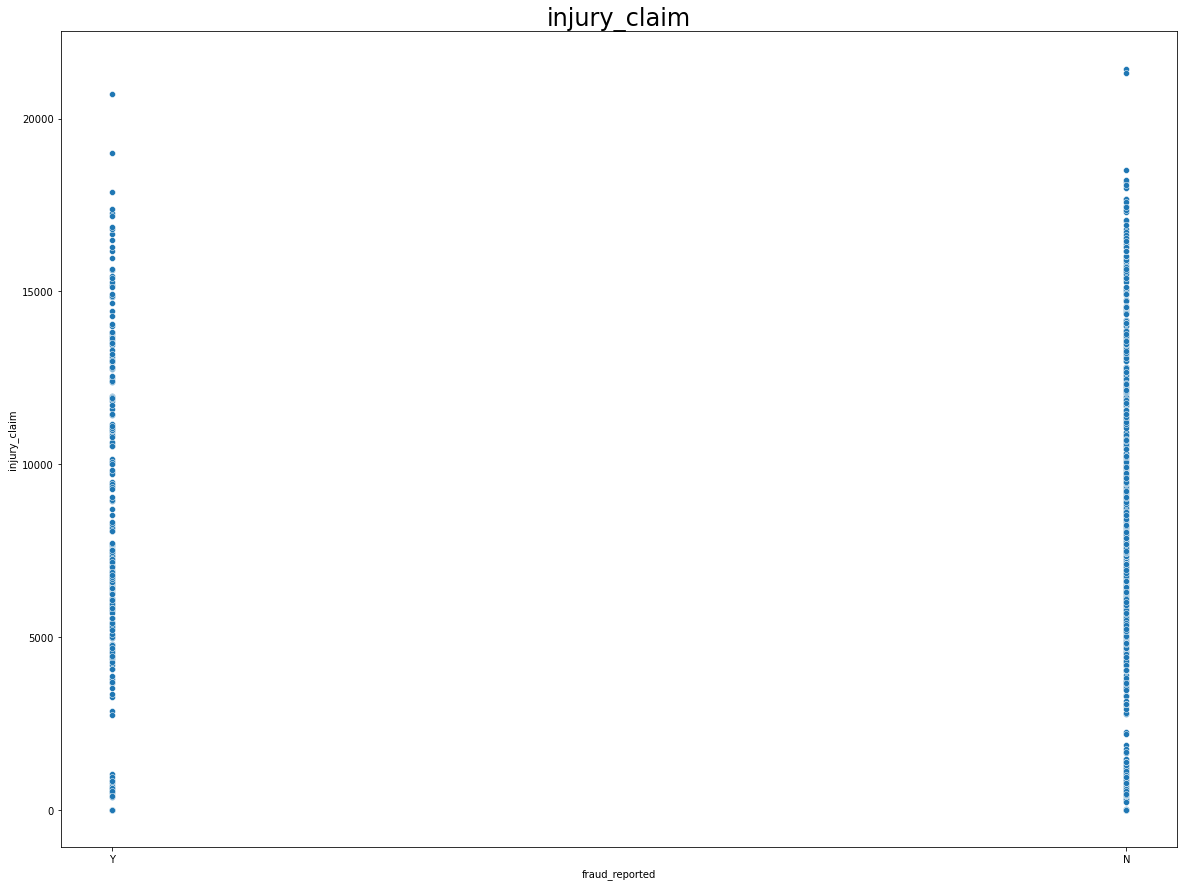

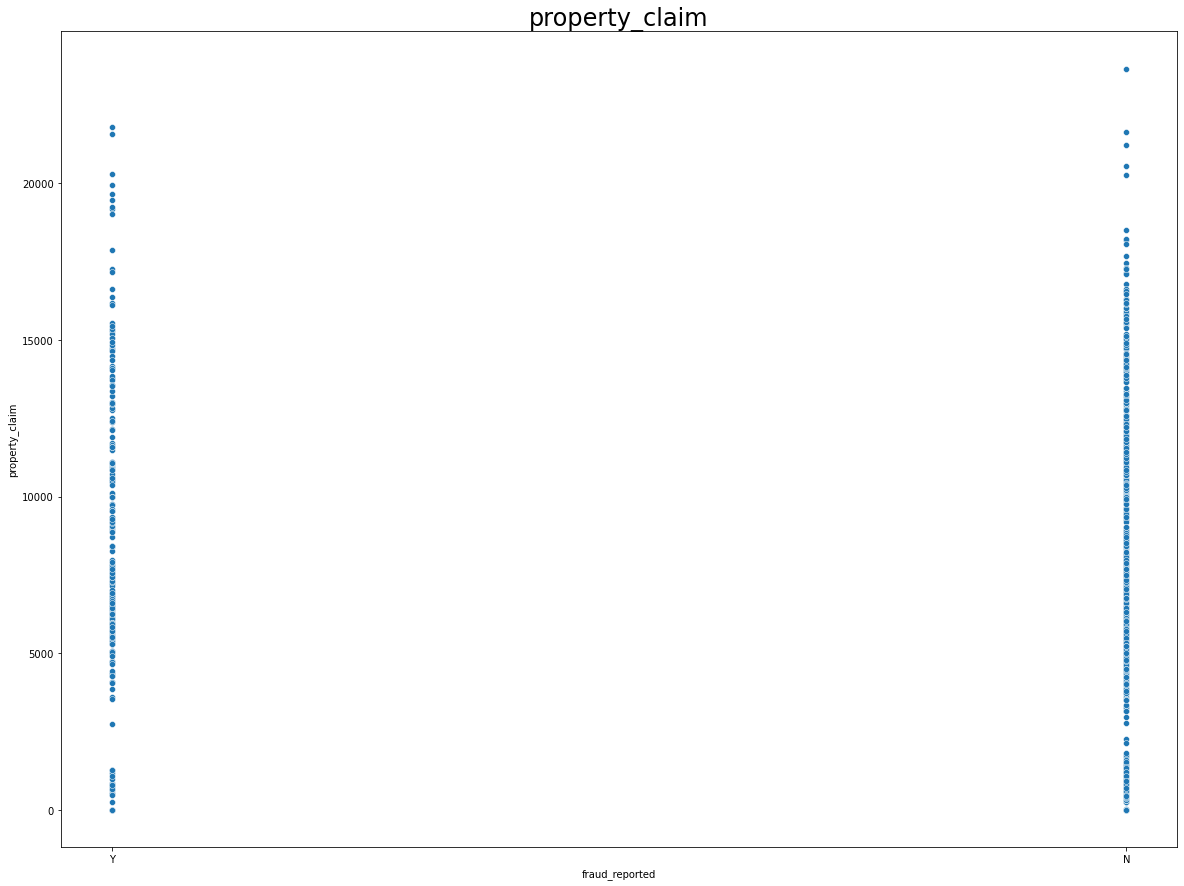

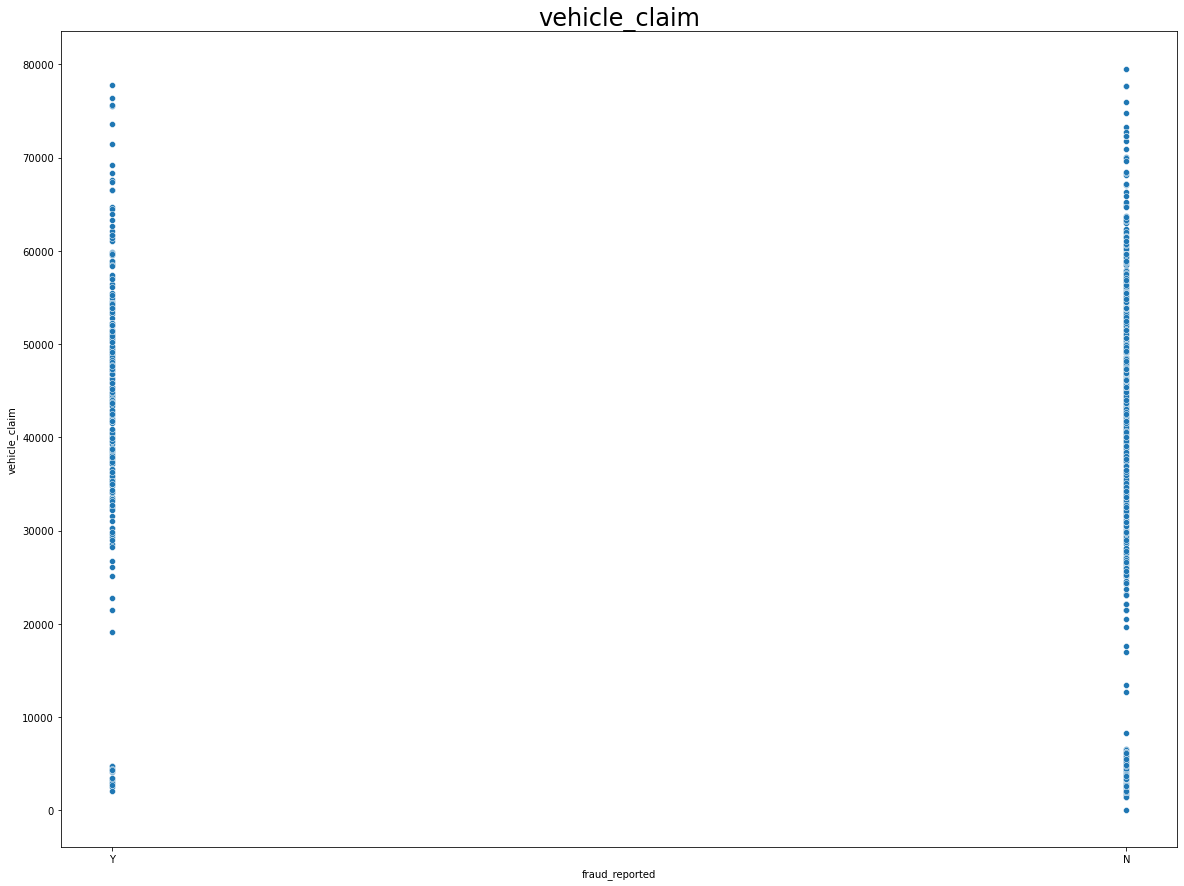

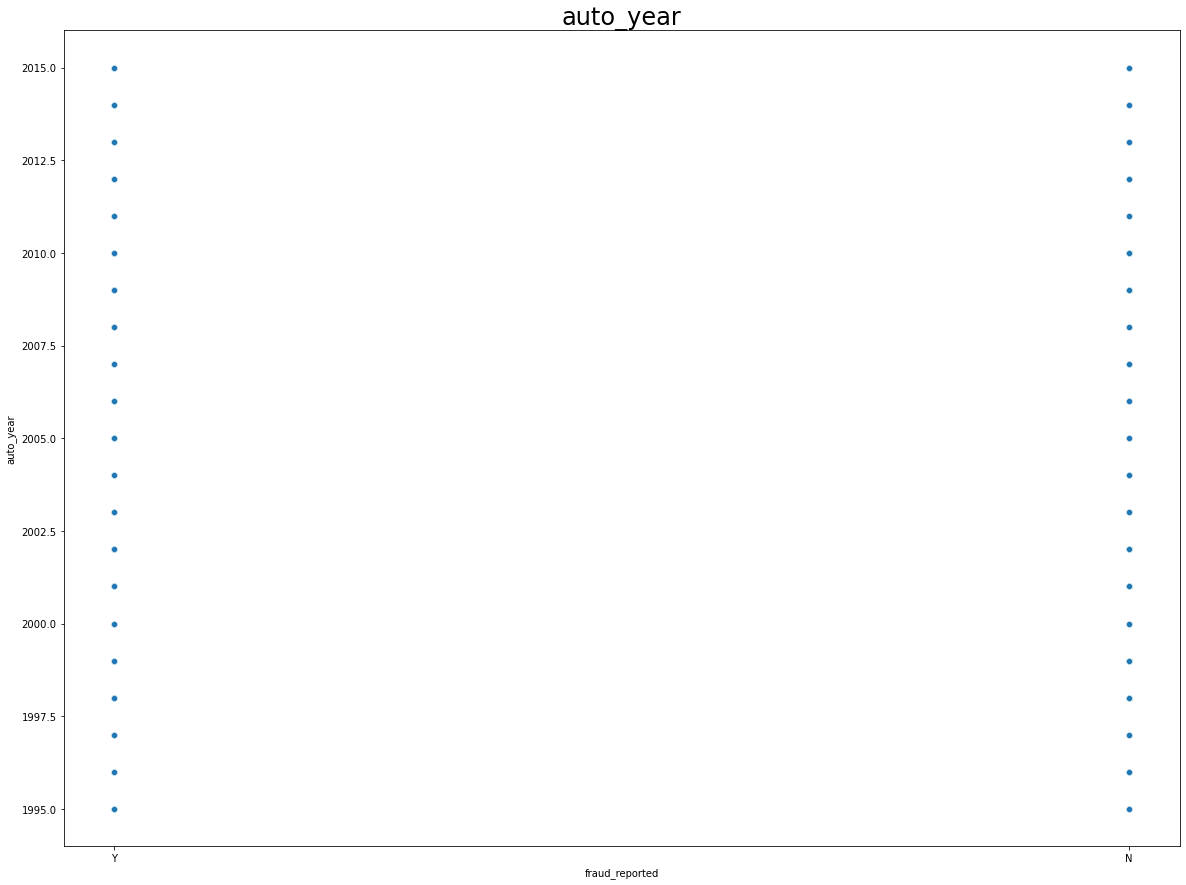

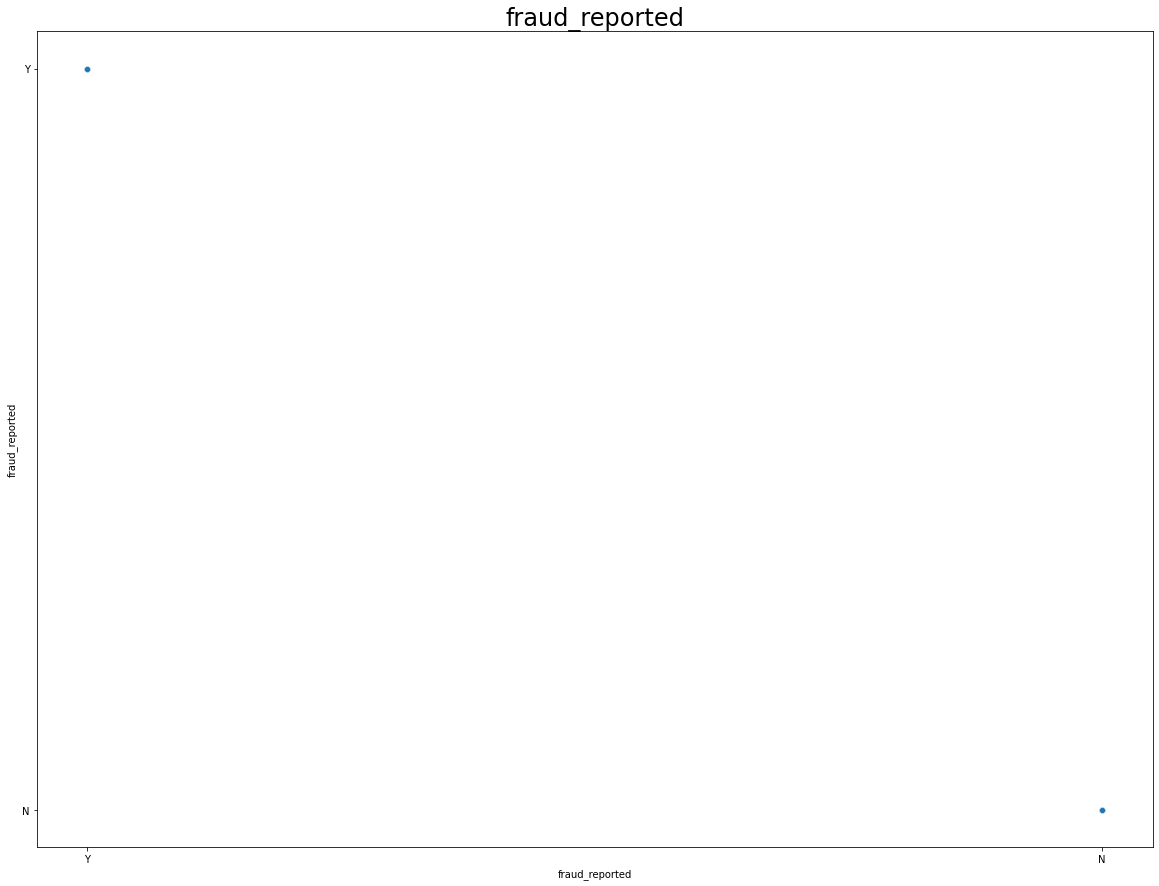

In [26]:
for i in num:
    fig_size = (20,15)
    fig, ax = plt.subplots(figsize = fig_size)
    plt.title(i, fontsize=24)
    sns.scatterplot(x="fraud_reported", y= i, data=fraud)   

In [19]:
num

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'fraud_reported']

### Observation:

- months_as_customer : Both the "yes" and "no" counts are equaly valued
- age : Both the "yes" and "no" counts are equaly valued
- policy_number : Both the "yes" and "no" counts are equaly valued
- policy_deductable: Both the "yes" and "no" counts are equaly valued
- policy_annual_premium: Annual premium between 800 to 1000 are claimed to be fraud
- umbrella_limit : Both the "yes" and "no" counts are equaly valued
- insured_zip: Both the "yes" and "no" counts are equaly valued
- capital-gains : Both the "yes" and "no" counts are equaly valued
- capital-loss : -90k to -20k are claimed to be fraud
- incident_hour_of_the_day: Both the "yes" and "no" counts are equaly valued
- number_of_vehicles_involved: Both the "yes" and "no" counts are equaly valued
- bodily_injuries: Both the "yes" and "no" counts are equaly valued
- witnesses: Both the "yes" and "no" counts are equaly valued



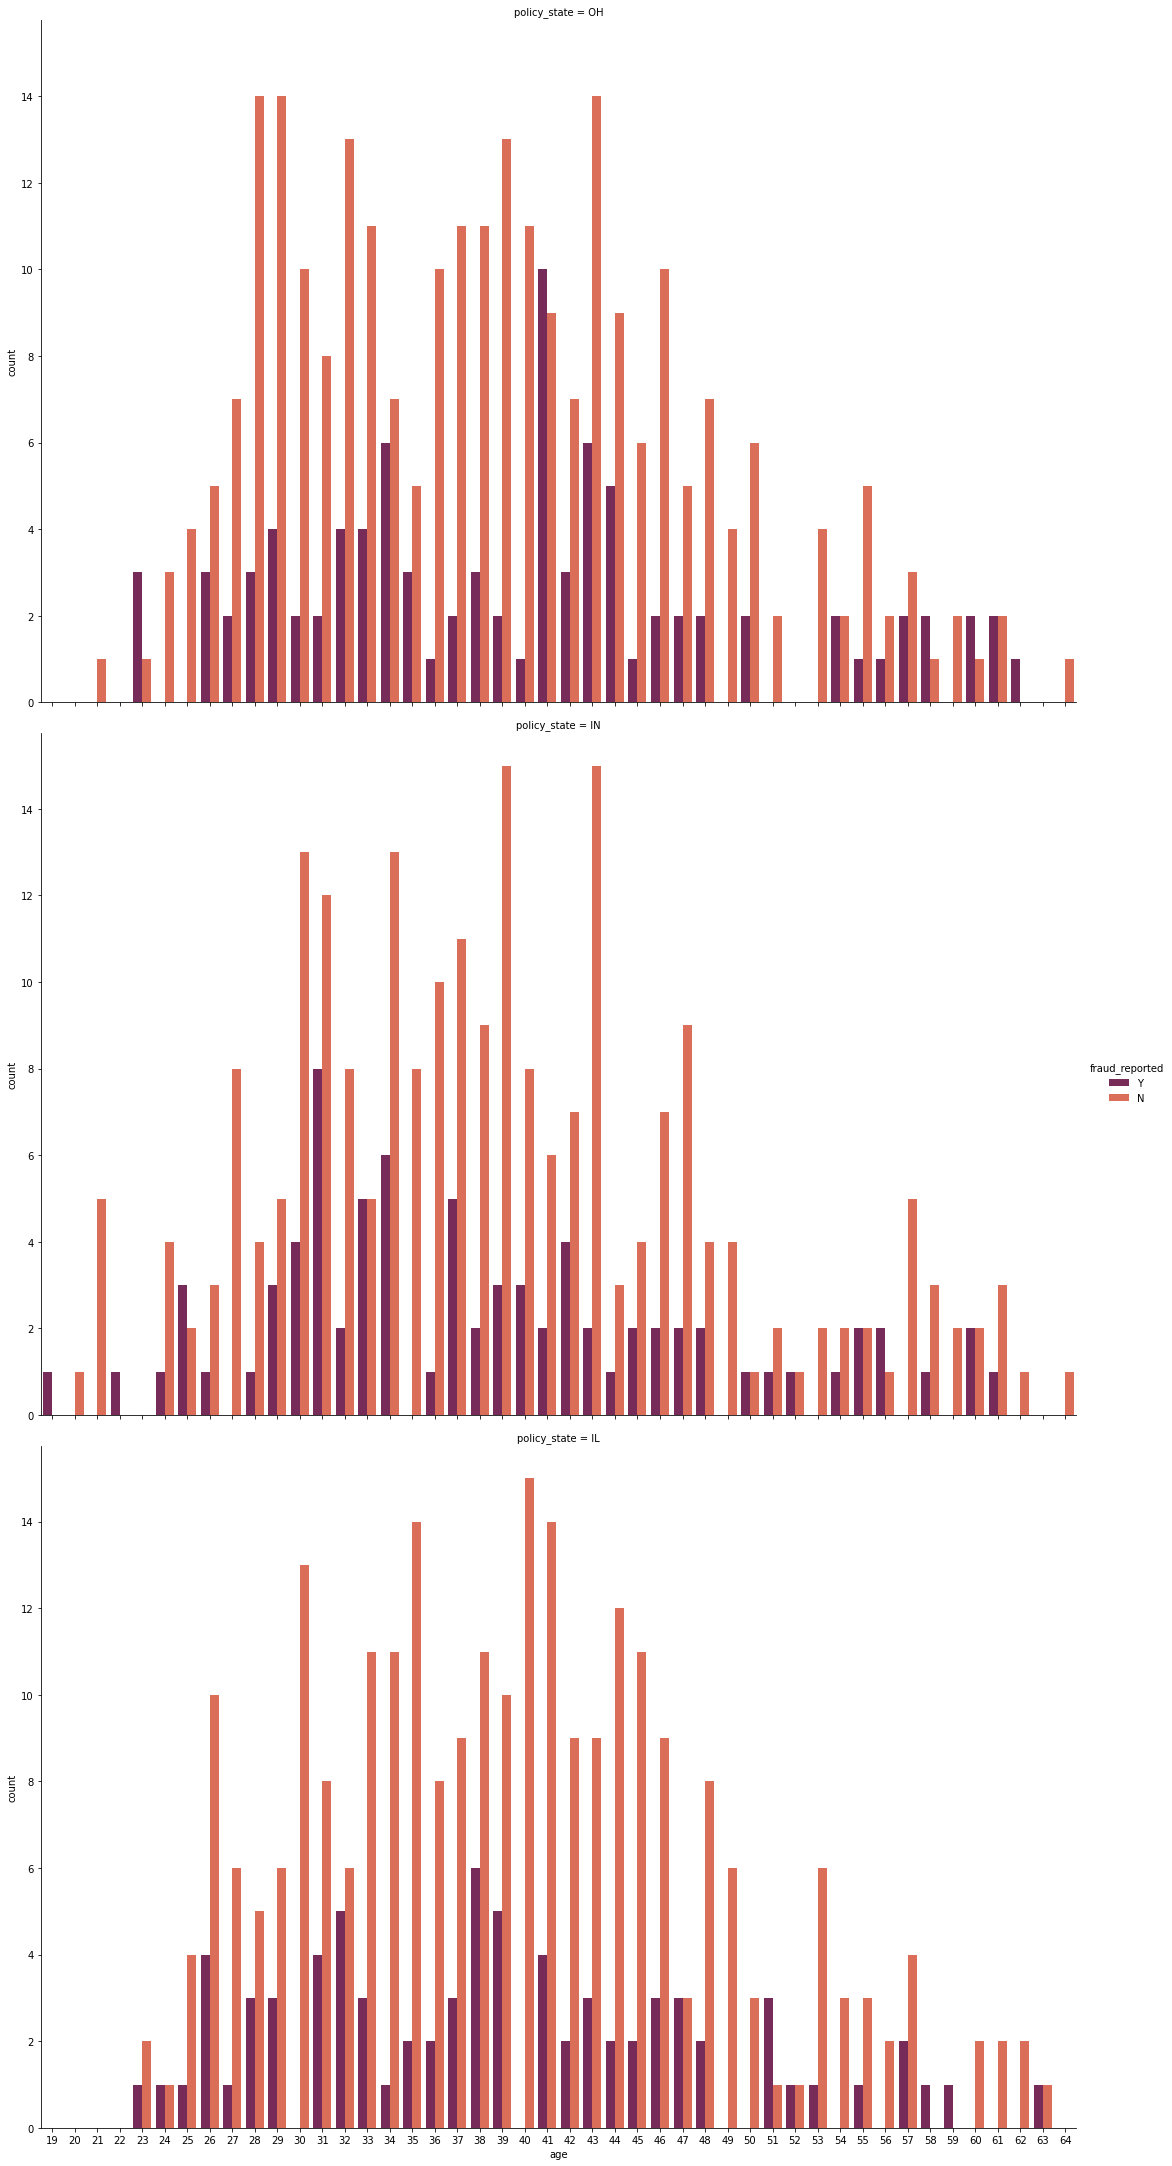

In [75]:
sns.catplot(data=fraud, x="age", hue="fraud_reported", col_wrap=1, col="policy_state", palette="rocket", kind="count", height = 10, aspect = 1.5)

### Observations:

- In the state OH:
    - Customer of age 40 t0 44 have a high fraud claim
- In the state IN:
    - customers of age 19 have taken a fraud claim
    - With age of 31 and 34 have a high fraud claim
- In the state of IL:
    - Age 26, 32, 38,39,and 41 have taken a high fraud claim

In [35]:
fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

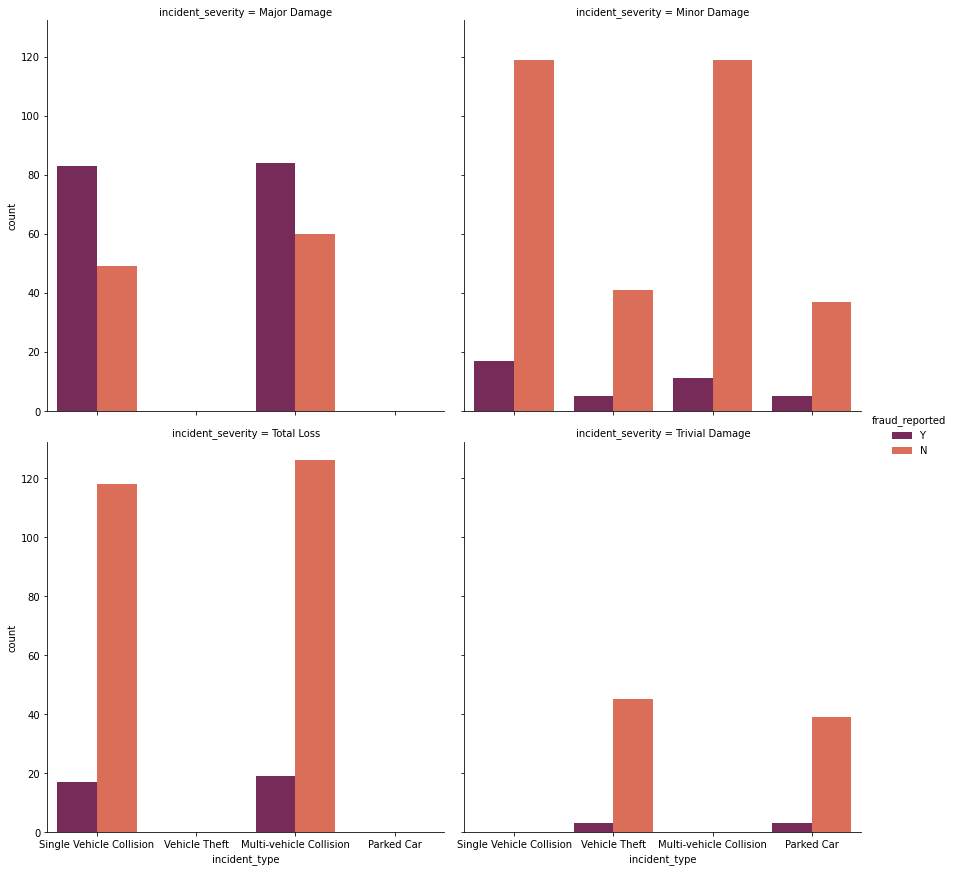

In [72]:
sns.catplot(data=fraud, x="incident_type", hue="fraud_reported", col_wrap=2, col='incident_severity', palette="rocket", kind="count", height = 6, aspect = 1)

### Observations:
For Incident Type major Damage:
    - SINGLE VECHICLE COLLISION has the highest fraudulent claim


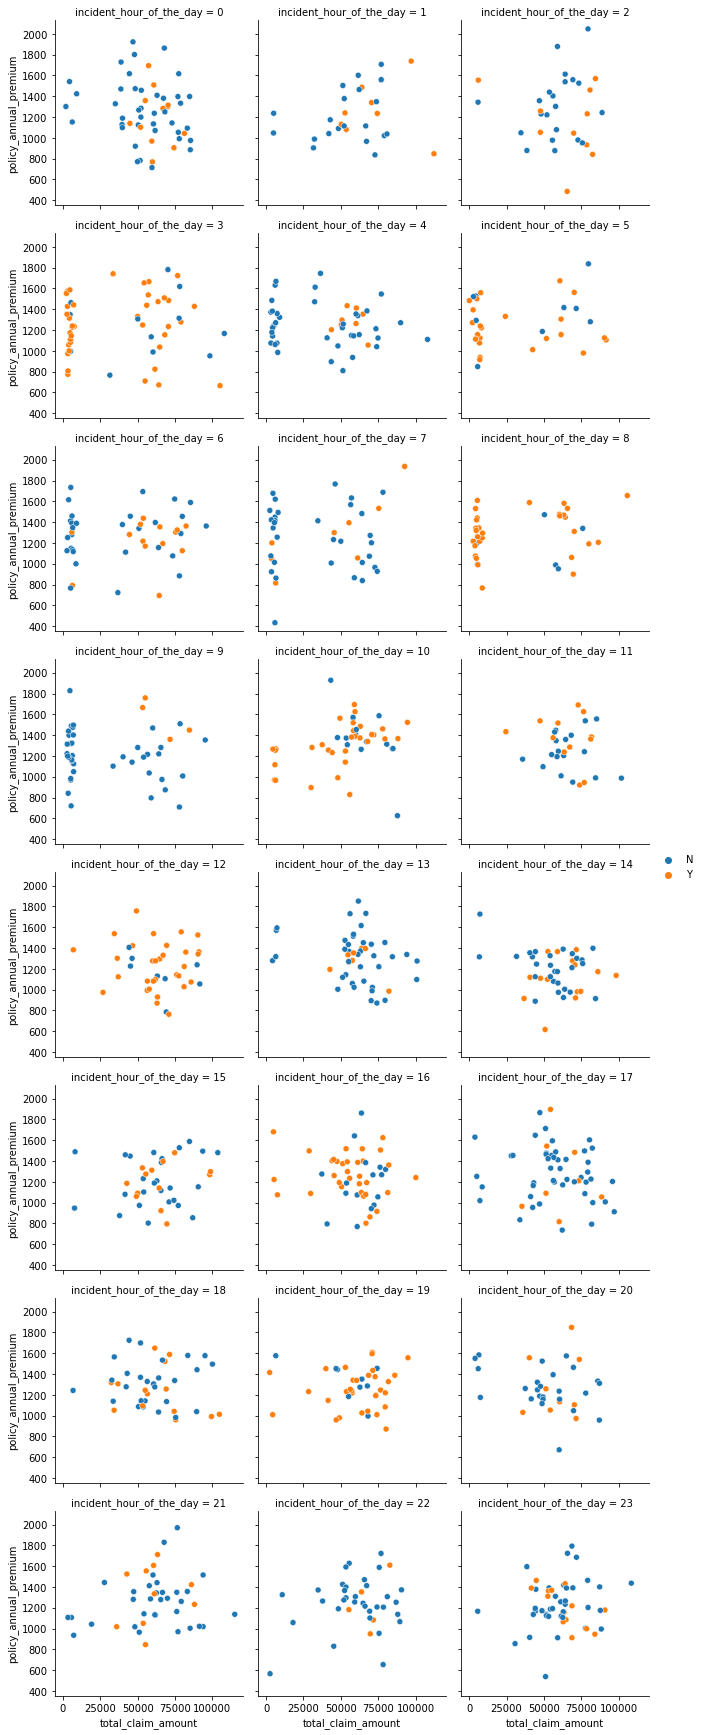

In [70]:
g = sns.FacetGrid(fraud, col="incident_hour_of_the_day", col_wrap=3)
g.map_dataframe(sns.scatterplot, x="total_claim_amount", y="policy_annual_premium", hue="fraud_reported")
g.set_axis_labels("total_claim_amount", "policy_annual_premium")
g.add_legend()

### Observations:
days 12, day 3 and day 8 - have highest record of fraud claim

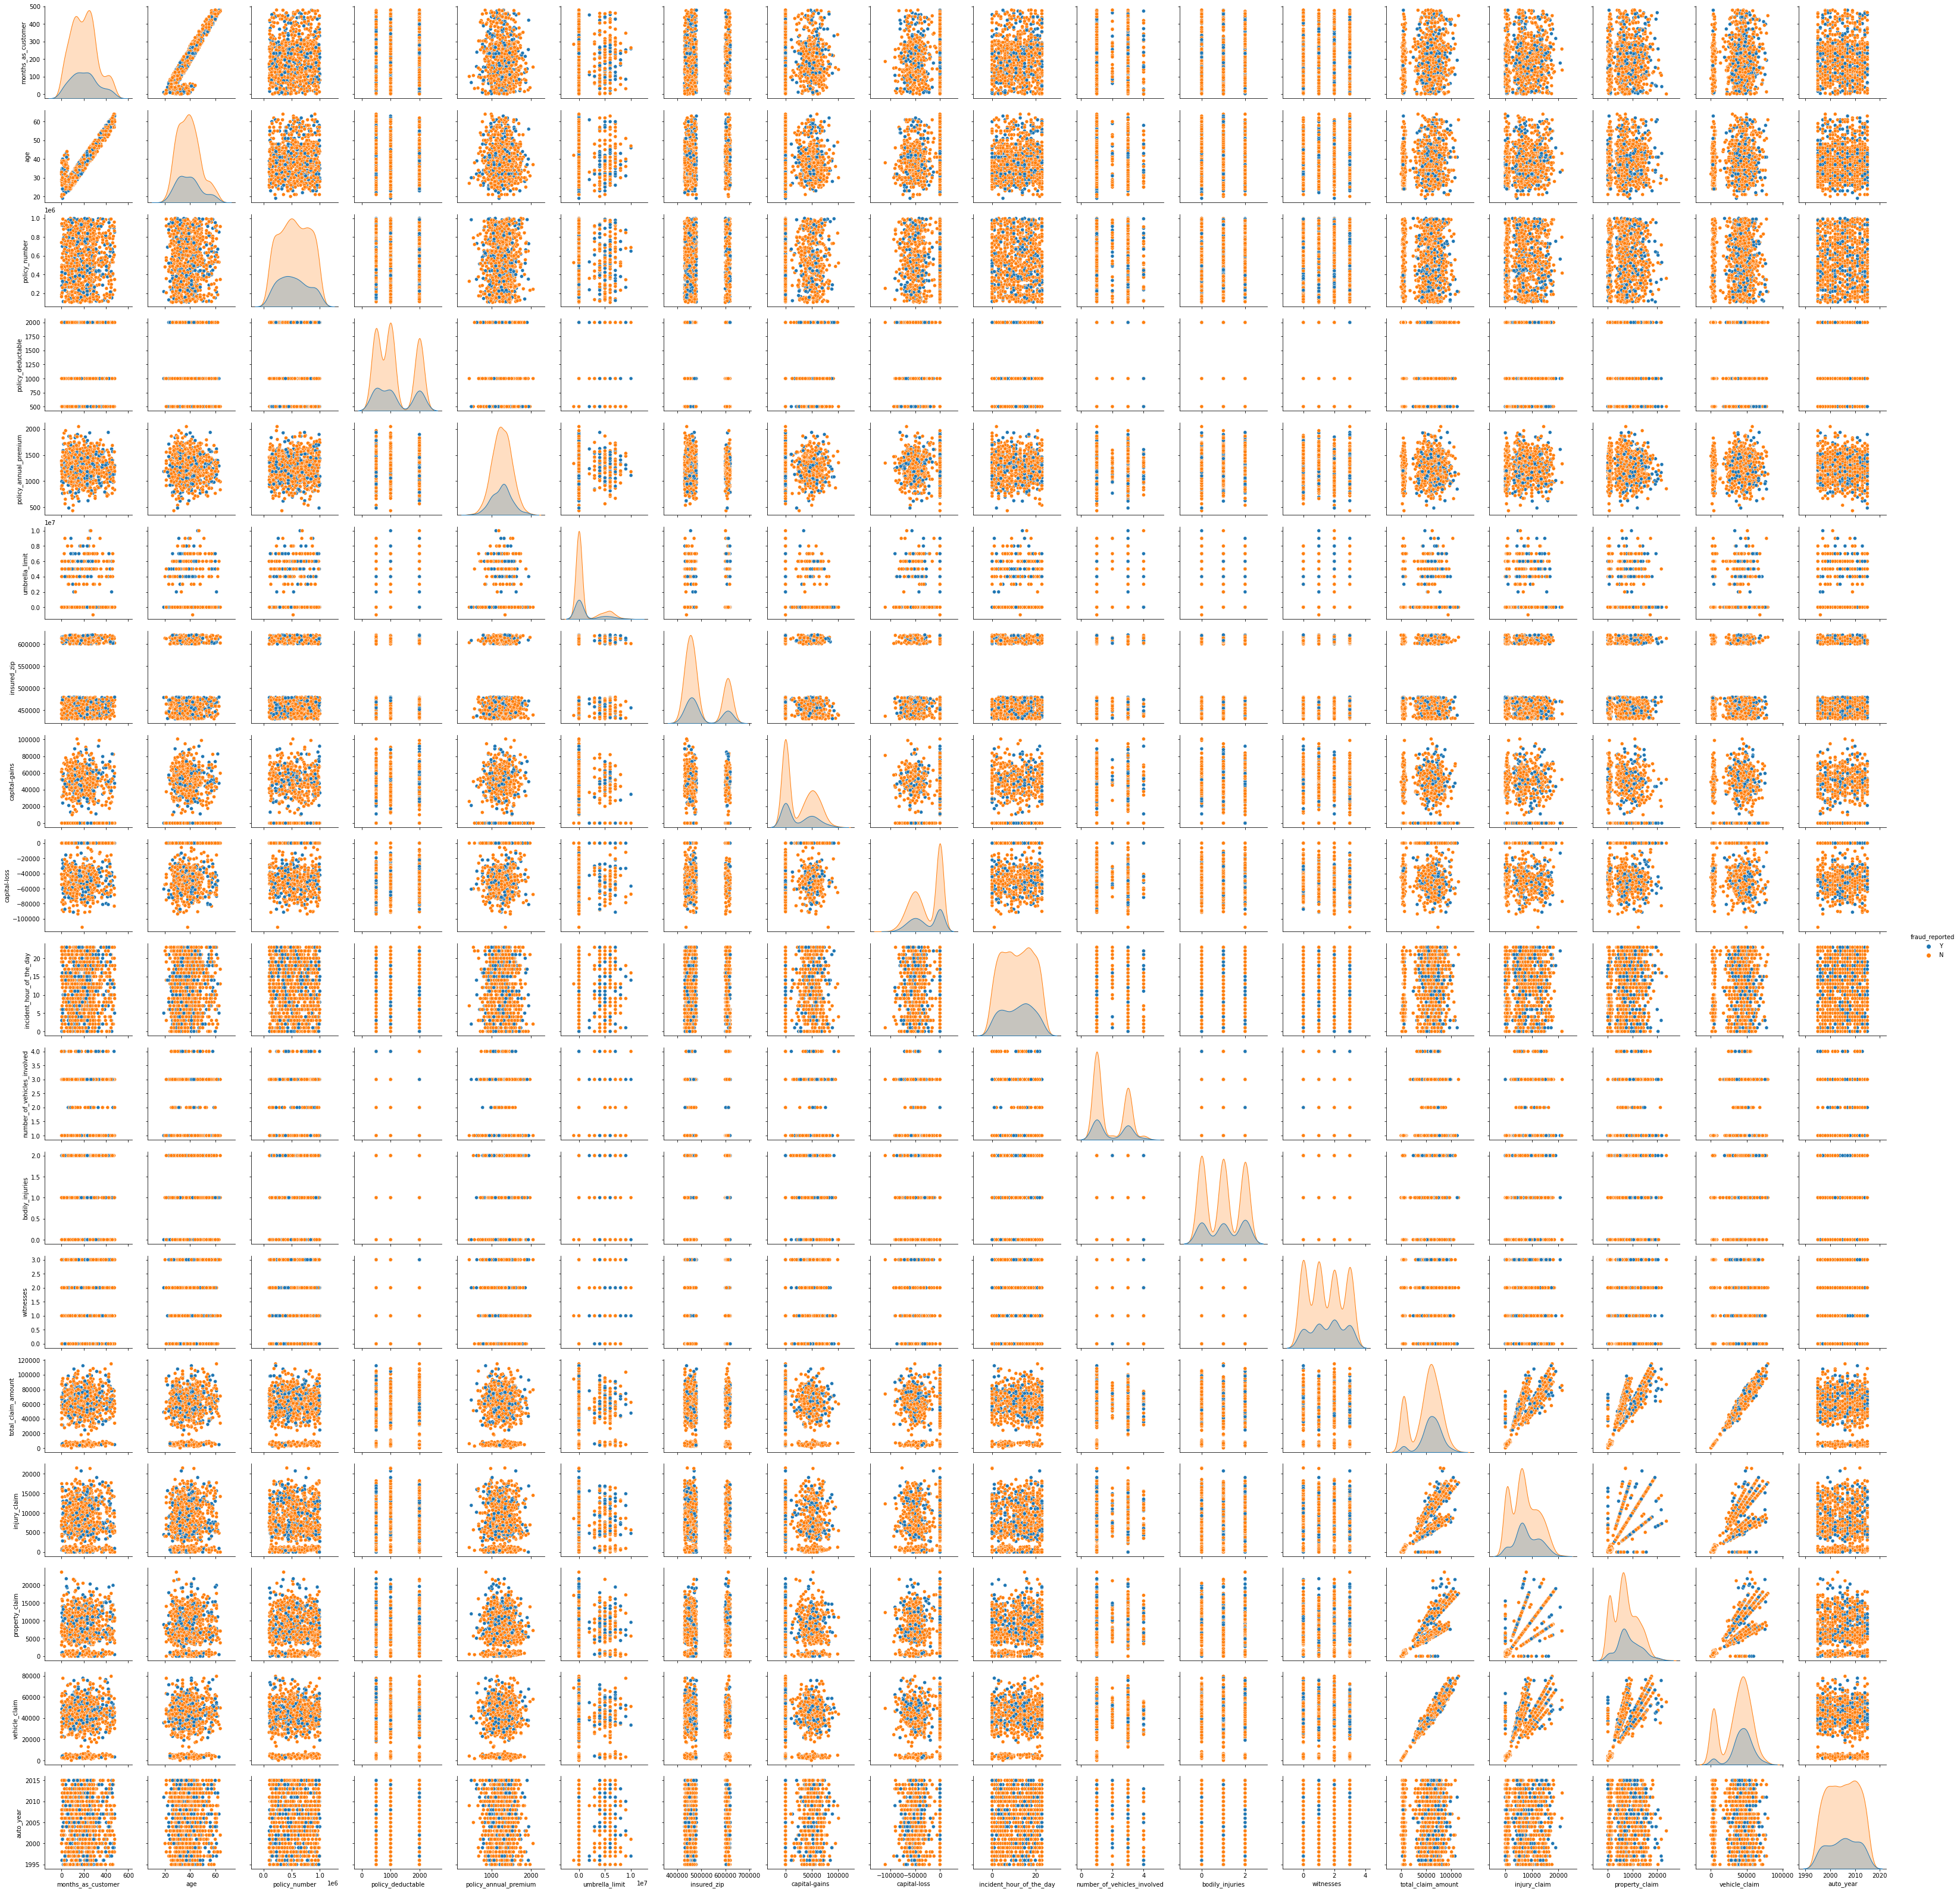

In [76]:
sns.pairplot(fraud, hue="fraud_reported")

In [147]:
fraud.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [148]:
obj

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

## Checing for null values

In [149]:
fraud.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses           

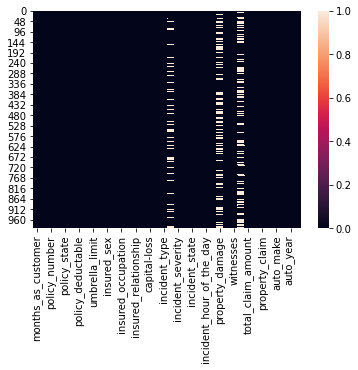

In [150]:
sns.heatmap(fraud.isnull())

### Using simple imputer to replace null vaues

In [20]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = "most_frequent")
fraud["collision_type"]=imp.fit_transform(fraud["collision_type"].values.reshape(-1,1))
fraud["property_damage"]=imp.fit_transform(fraud["property_damage"].values.reshape(-1,1))
fraud["police_report_available"]=imp.fit_transform(fraud["police_report_available"].values.reshape(-1,1))

In [21]:
fraud.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

### Apply label encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in obj:
    fraud[x]=le.fit_transform(fraud[x])

In [23]:
fraud.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                            int32
policy_csl                              int32
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                             int32
insured_education_level                 int32
insured_occupation                      int32
insured_hobbies                         int32
insured_relationship                    int32
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                           int32
collision_type                          int32
incident_severity                       int32
authorities_contacted             

In [24]:
#converting date to ordinal type for prediction
import datetime as dt
fraud["policy_bind_date"] = fraud["policy_bind_date"].map(dt.datetime.toordinal)
fraud["incident_date"] = fraud["incident_date"].map(dt.datetime.toordinal)

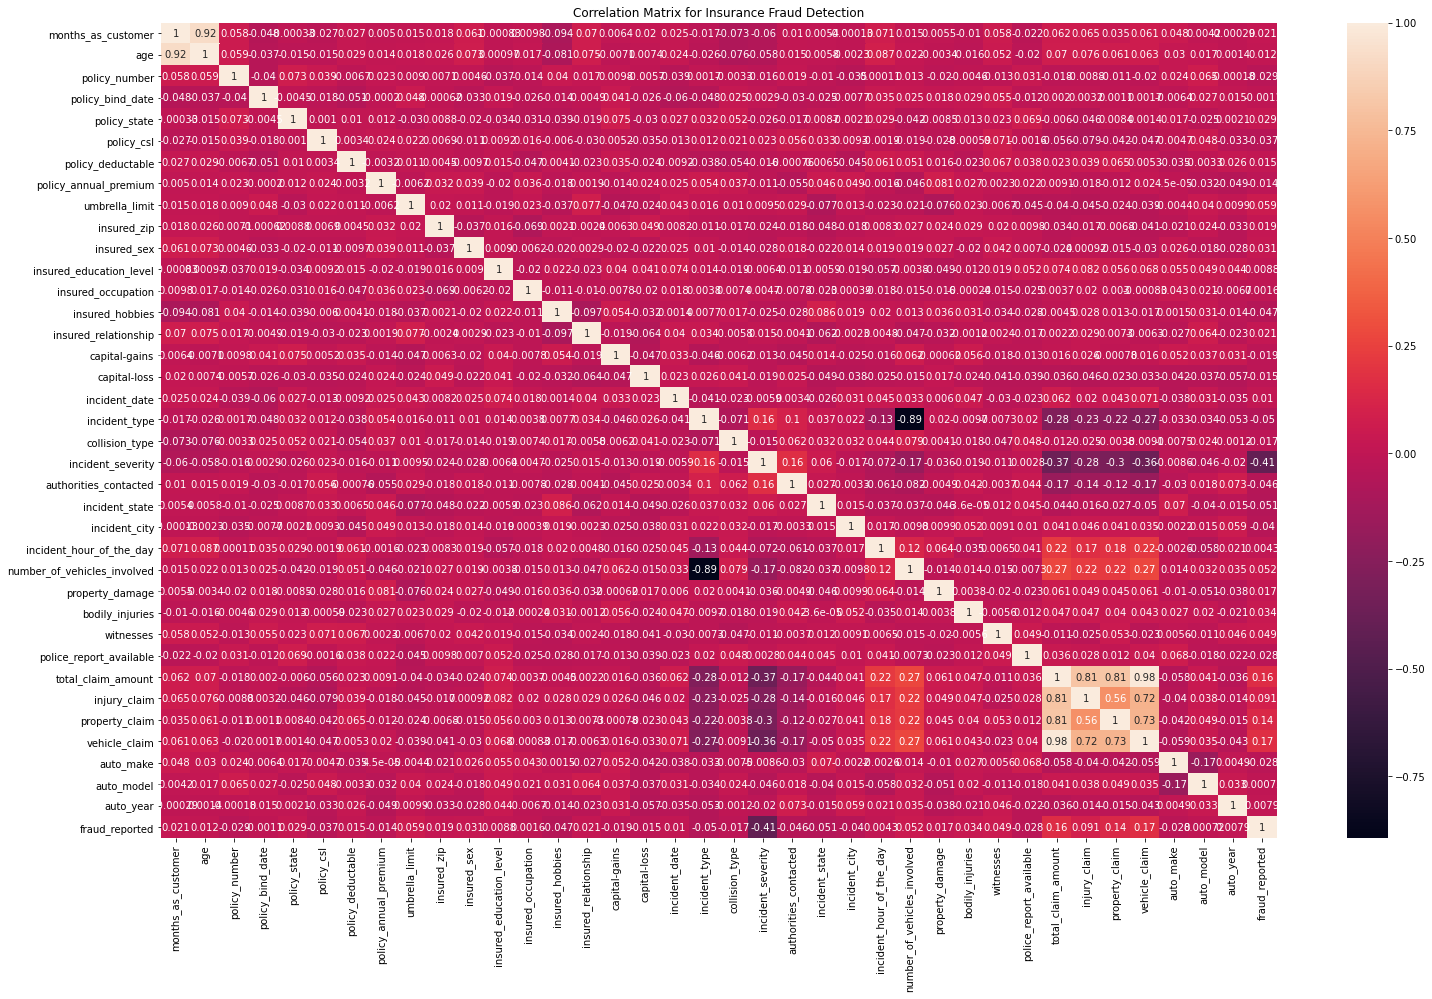

In [25]:
#correlation matrix to find correlation amoung the columns
correlation = fraud.corr()
plt.figure(figsize = [25,15])
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matrix for Insurance Fraud Detection")
plt.show()

## Check for multicolinearity

In [26]:
# import libraries
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
#function to find multicollinearity
def find_multicollinearity(data):
    variance = pd.DataFrame()
    data = sma.add_constant(data)
    variance["COLUMN NAME"] = data.columns
    variance["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return(variance)


In [28]:
find_multicollinearity(fraud)

COLUMN NAME           VIF
0                         const  6.632668e+07
1            months_as_customer  6.849101e+00
2                           age  6.855901e+00
3                 policy_number  1.031740e+00
4              policy_bind_date  1.033642e+00
5                  policy_state  1.039980e+00
6                    policy_csl  1.030649e+00
7             policy_deductable  1.040341e+00
8         policy_annual_premium  1.037470e+00
9                umbrella_limit  1.040259e+00
10                  insured_zip  1.027711e+00
11                  insured_sex  1.029128e+00
12      insured_education_level  1.048847e+00
13           insured_occupation  1.020826e+00
14              insured_hobbies  1.054178e+00
15         insured_relationship  1.045839e+00
16                capital-gains  1.038467e+00
17                 capital-loss  1.042538e+00
18                incident_date  1.040447e+00
19                incident_type  5.127482e+00
20               collision_type  1.043400e+00
21            incident_severity  1.397766e+00
22        authorities_contacted  1.083160e+00
23               incident_state  1.047689e+00
24                incident_city  1.026910e+00
25     incident_hour_of_the_day  1.098921e+00
26  number_of_vehicles_involved  5.102817e+00
27              property_damage  1.037197e+00
28              bodily_injuries  1.025191e+00
29                    witnesses  1.048032e+00
30      police_report_available  1.040139e+00
31           total_claim_amount           inf
32                 injury_claim           inf
33               property_claim           inf
34                vehicle_claim           inf
35                    auto_make  1.073179e+00
36                   auto_model  1.070997e+00
37                    auto_year  1.041484e+00
38               fraud_reported  1.233772e+00

In [33]:
vif = pd.DataFrame()
vif["feature"]= fraud.columns
vif["VIF"]= [variance_inflation_factor(fraud.values, i)
                          for i in range(len(fraud.columns))]

In [34]:
vif

feature           VIF
0            months_as_customer  2.837067e+01
1                           age  1.314647e+02
2                 policy_number  5.684857e+00
3              policy_bind_date  7.563456e+04
4                  policy_state  2.586844e+00
5                    policy_csl  2.471370e+00
6             policy_deductable  4.629306e+00
7         policy_annual_premium  2.852163e+01
8                umbrella_limit  1.276448e+00
9                   insured_zip  5.129539e+01
10                  insured_sex  1.915268e+00
11      insured_education_level  3.456448e+00
12           insured_occupation  3.819587e+00
13              insured_hobbies  4.157561e+00
14         insured_relationship  3.203714e+00
15                capital-gains  1.880417e+00
16                 capital-loss  1.990201e+00
17                incident_date  1.896166e+05
18                incident_type  1.113916e+01
19               collision_type  3.098936e+00
20            incident_severity  3.618157e+00
21        authorities_contacted  3.250713e+00
22               incident_state  3.418671e+00
23                incident_city  3.186967e+00
24     incident_hour_of_the_day  4.176562e+00
25  number_of_vehicles_involved  2.173498e+01
26              property_damage  1.485907e+00
27              bodily_injuries  2.521789e+00
28                    witnesses  2.924983e+00
29      police_report_available  1.515277e+00
30           total_claim_amount           inf
31                 injury_claim           inf
32               property_claim           inf
33                vehicle_claim           inf
34                    auto_make  3.895240e+00
35                   auto_model  4.294425e+00
36                    auto_year  1.150999e+05
37               fraud_reported  1.638474e+00

#### policy number - multicollinerity 
    - Drop the column

In [35]:
fraud = fraud.drop("policy_number", axis=1)

In [36]:
fraud

months_as_customer  age  policy_bind_date  policy_state  policy_csl  \
0                   328   48            735523             2           1   
1                   228   42            732489             1           1   
2                   134   29            730280             2           0   
3                   256   41            726612             0           1   
4                   228   44            735390             0           2   
..                  ...  ...               ...           ...         ...   
995                   3   38            727029             2           2   
996                 285   41            735354             0           0   
997                 130   34            731263             2           1   
998                 458   62            734459             0           2   
999                 456   60            728974             2           1   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

     insured_sex  ...  witnesses  police_report_available  total_claim_amount  \
0              1  ...          2                        1               71610   
1              1  ...          0                        0                5070   
2              0  ...          3                        0               34650   
3              0  ...          2                        0               63400   
4              1  ...          1                        0                6500   
..           ...  ...        ...                      ...                 ...   
995            0  ...          1                        0               87200   
996            0  ...          3                        0              108480   
997            0  ...          3                        1               67500   
998            1  ...          1                        1               46980   
999            0  ...          3                        0                5060   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0            6510           13020          52080         10           1   
1             780             780           3510          8          12   
2            7700            3850          23100          4          30   
3            6340            6340          50720          3          34   
4            1300             650           4550          0          31   
..            ...             ...            ...        ...         ...   
995         17440            8720          61040          6           6   
996         18080           18080          72320         13          28   
997          7500            7500          52500         11          19   
998          5220            5220          36540          1           5   
999           460             920           3680          8          12   

     auto_year  fraud_reported  
0         2004               1  
1         2007               1  
2         2007               0  
3         2014               1  
4         2009               0  
..         ...             ...  
995       2006               0  
996       2015   

In [37]:
fraud.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

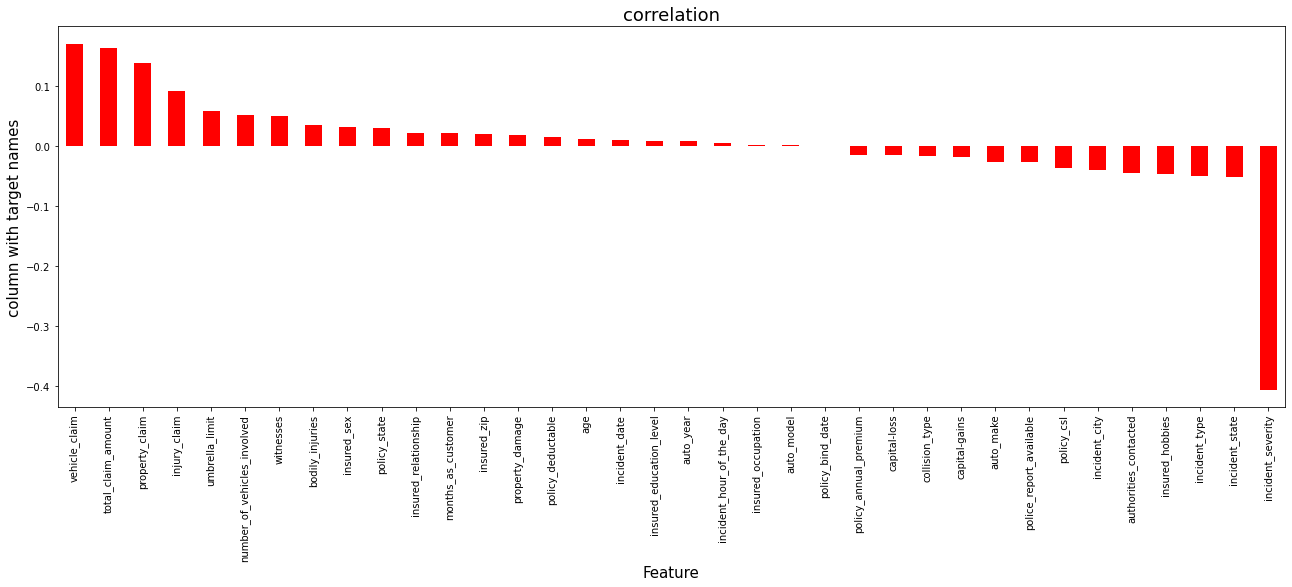

In [38]:
plt.figure(figsize=(22,7))
fraud.corr()["fraud_reported"].sort_values(ascending = False).drop(["fraud_reported"]).plot(kind = "bar", color = "r")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("column with target names", fontsize = 15)
plt.title("correlation", fontsize=18)
plt.show()

### Obsevation:

- incident hour of the day, insured occupation and auto model are poorly correlated with target.
- policy_bind_date as no correlation with target variable

In [ ]:
#drop policy binf date
fraud = fraud.drop("policy_bind_date", axis=1)

In [41]:
fraud

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

     insured_education_level  ...  witnesses  police_report_available  \
0                          4  ...          2                        1   
1                          4  ...          0                        0   
2                          6  ...          3                        0   
3                          6  ...          2                        0   
4                          0  ...          1                        0   
..                       ...  ...        ...                      ...   
995                        5  ...          1                        0   
996                        6  ...          3                        0   
997                        5  ...          3                        1   
998                        0  ...          1                        1   
999                        0  ...          3                        0   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
995               87200         17440            8720          61040   
996              108480         18080           18080          72320   
997               67500          7500            7500          52500   
998               46980          5220            5220          36540   
999                5060           460             920           3680   

     auto_make  auto_model  auto_year  fraud_reported  
0           10           1       2004               1  
1            8          12       2007               1  
2            4          30       2007               0  
3            3          34       2014               1  
4            0          31       2009               0  
..         ...         ...        ...             ...  
995          6           6       2006               0  
996         13          2

In [42]:
fraud.describe()

months_as_customer          age  policy_state   policy_csl  \
count         1000.000000  1000.000000    1000.00000  1000.000000   
mean           203.954000    38.948000       1.01400     0.951000   
std            115.113174     9.140287       0.83096     0.804516   
min              0.000000    19.000000       0.00000     0.000000   
25%            115.750000    32.000000       0.00000     0.000000   
50%            199.500000    38.000000       1.00000     1.000000   
75%            276.250000    44.000000       2.00000     2.000000   
max            479.000000    64.000000       2.00000     2.000000   

       policy_deductable  policy_annual_premium  umbrella_limit  \
count        1000.000000            1000.000000    1.000000e+03   
mean         1136.000000            1256.406150    1.101000e+06   
std           611.864673             244.167395    2.297407e+06   
min           500.000000             433.330000   -1.000000e+06   
25%           500.000000            1089.607500    0.000000e+00   
50%          1000.000000            1257.200000    0.000000e+00   
75%          2000.000000            1415.695000    0.000000e+00   
max          2000.000000            2047.590000    1.000000e+07   

         insured_zip  insured_sex  insured_education_level  ...    witnesses  \
count    1000.000000  1000.000000              1000.000000  ...  1000.000000   
mean   501214.488000     0.463000                 2.966000  ...     1.487000   
std     71701.610941     0.498879                 1.948497  ...     1.111335   
min    430104.000000     0.000000                 0.000000  ...     0.000000   
25%    448404.500000     0.000000                 1.000000  ...     1.000000   
50%    466445.500000     0.000000                 3.000000  ...     1.000000   
75%    603251.000000     1.000000                 5.000000  ...     2.000000   
max    620962.000000     1.000000                 6.000000  ...     3.000000   

       police_report_available  total_claim_amount  injury_claim  \
count              1000.000000          1000.00000   1000.000000   
mean                  0.314000         52761.94000   7433.420000   
std                   0.464349         26401.53319   4880.951853   
min                   0.000000           100.00000      0.000000   
25%                   0.000000         41812.50000   4295.000000   
50%                   0.000000         58055.00000   6775.000000   
75%                   1.000000         70592.50000  11305.000000   
max                   1.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_make   auto_model    auto_year  \
count     1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean      7399.570000   37928.950000     6.546000    19.318000  2005.103000   
std       4824.726179   18886.252893     4.034869    11.136107     6.015861   
min          0.000000      70.000000     0.000000     0.000000  1995.000000   
25%       4445.000000   30292.500000     3.000000    10.000000  2000.000000   
50%       6750.000000   42100.000000     7.000000    20.000000  2005.000000   
75%      10885.000000   50822.500000    10.000000    29.000000  2010.000000   
max      23670.000000   79560.000000    13.000000    38.000000  2015.000000   

       fraud_reported  
count     1000.000000  
mean         0.247000  
std          0.431483  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 36 columns]

### Observations
1. The mean and standard deviation have big difference for some of the categorical columns and that doesnt impact the skewness of the data 
2. The min and max range is high and hence scaling should be applied

# Checking for skewness and removal

## splitting data into x and y

In [43]:
x = fraud.drop("fraud_reported", axis=1)
y = fraud["fraud_reported"]

In [44]:
print(x.shape)
print(y.shape)

(1000, 35)
(1000,)


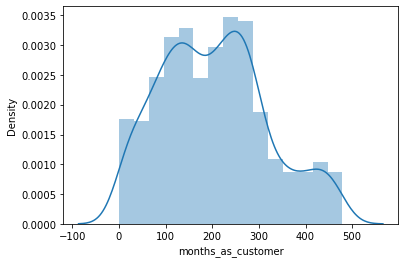

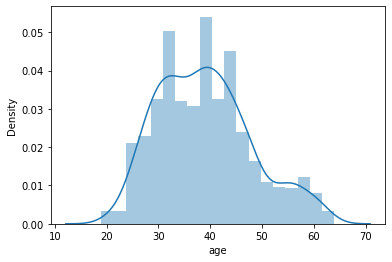

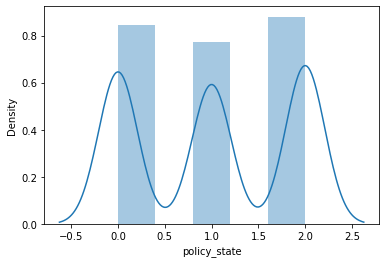

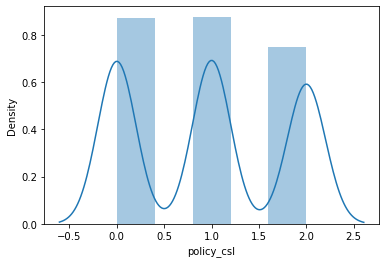

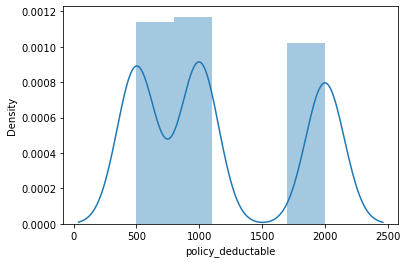

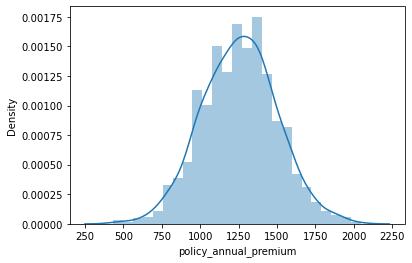

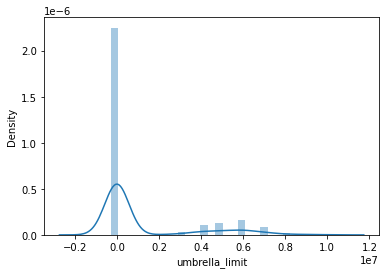

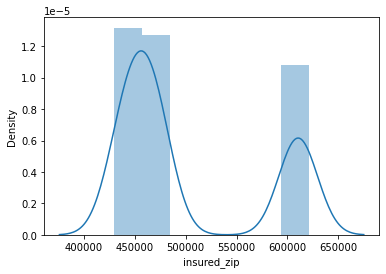

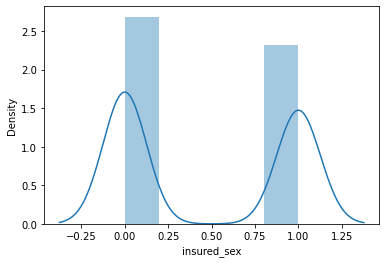

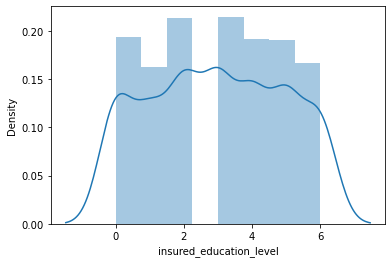

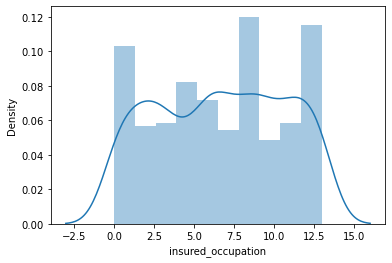

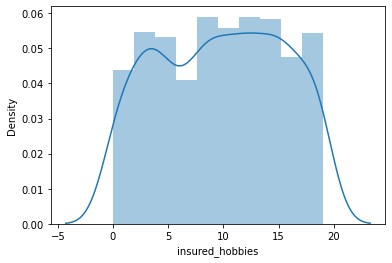

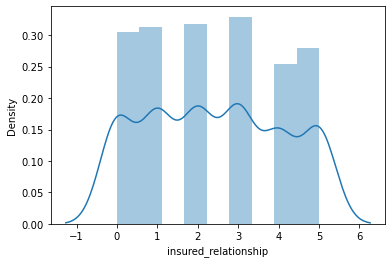

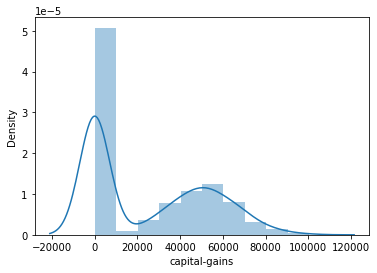

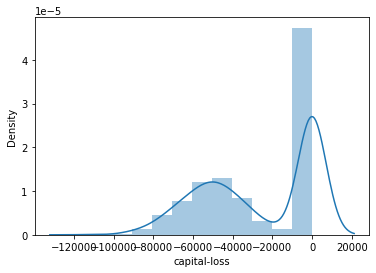

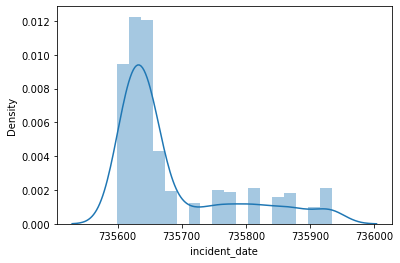

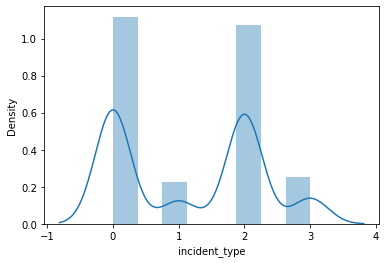

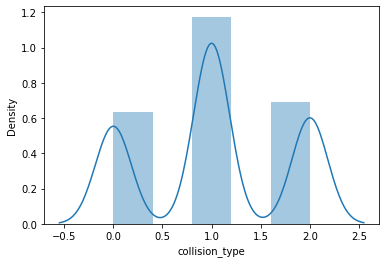

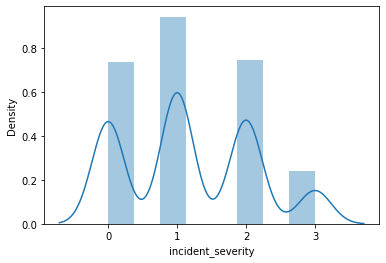

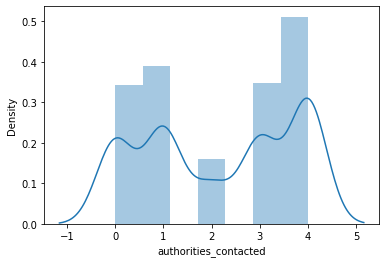

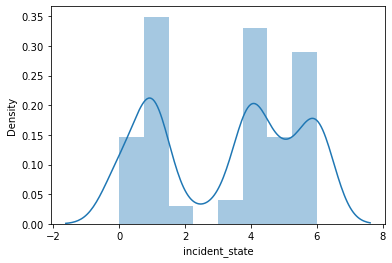

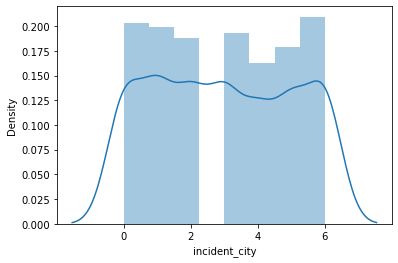

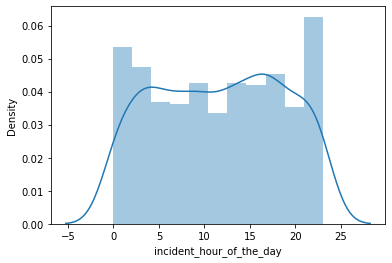

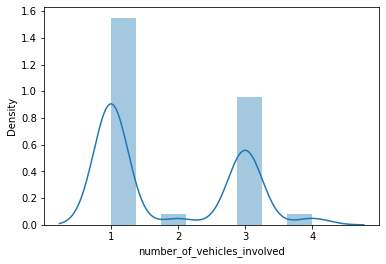

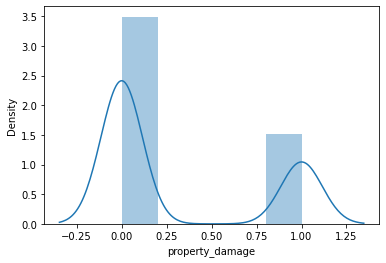

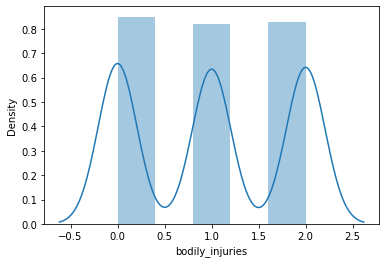

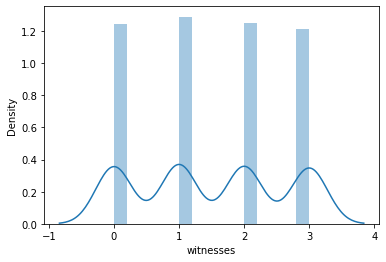

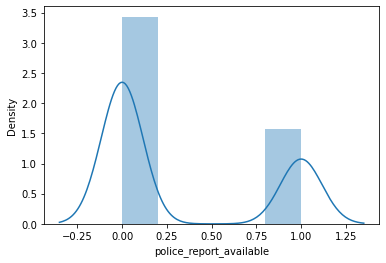

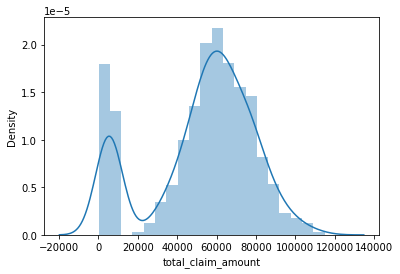

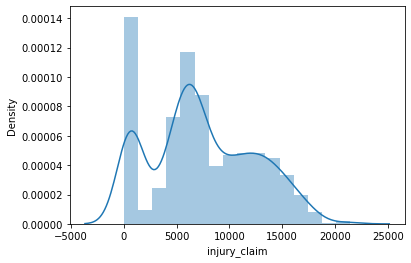

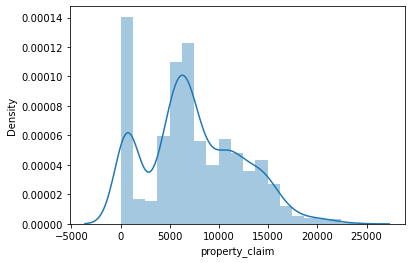

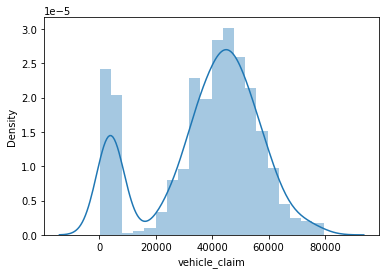

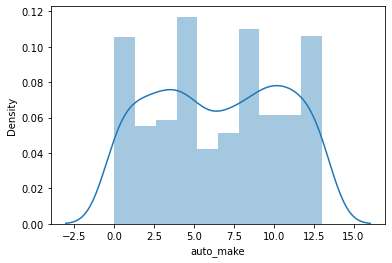

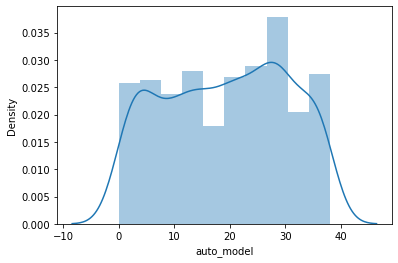

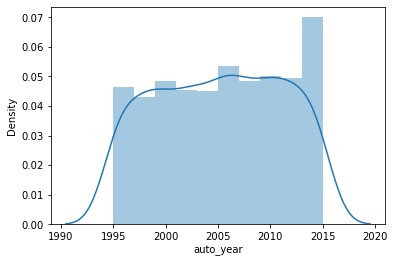

In [45]:
for i in x.columns:
    sns.distplot(x[i], kde=True)
    plt.show()

In [184]:
x.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  1.436400
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806


#### no skewness in data, the values which  have a skewness of 5 or more are categorical variables, There is no skewness in categorical data

### Check for outliers and removal

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 <a list of 36 Text major ticklabel objects>)

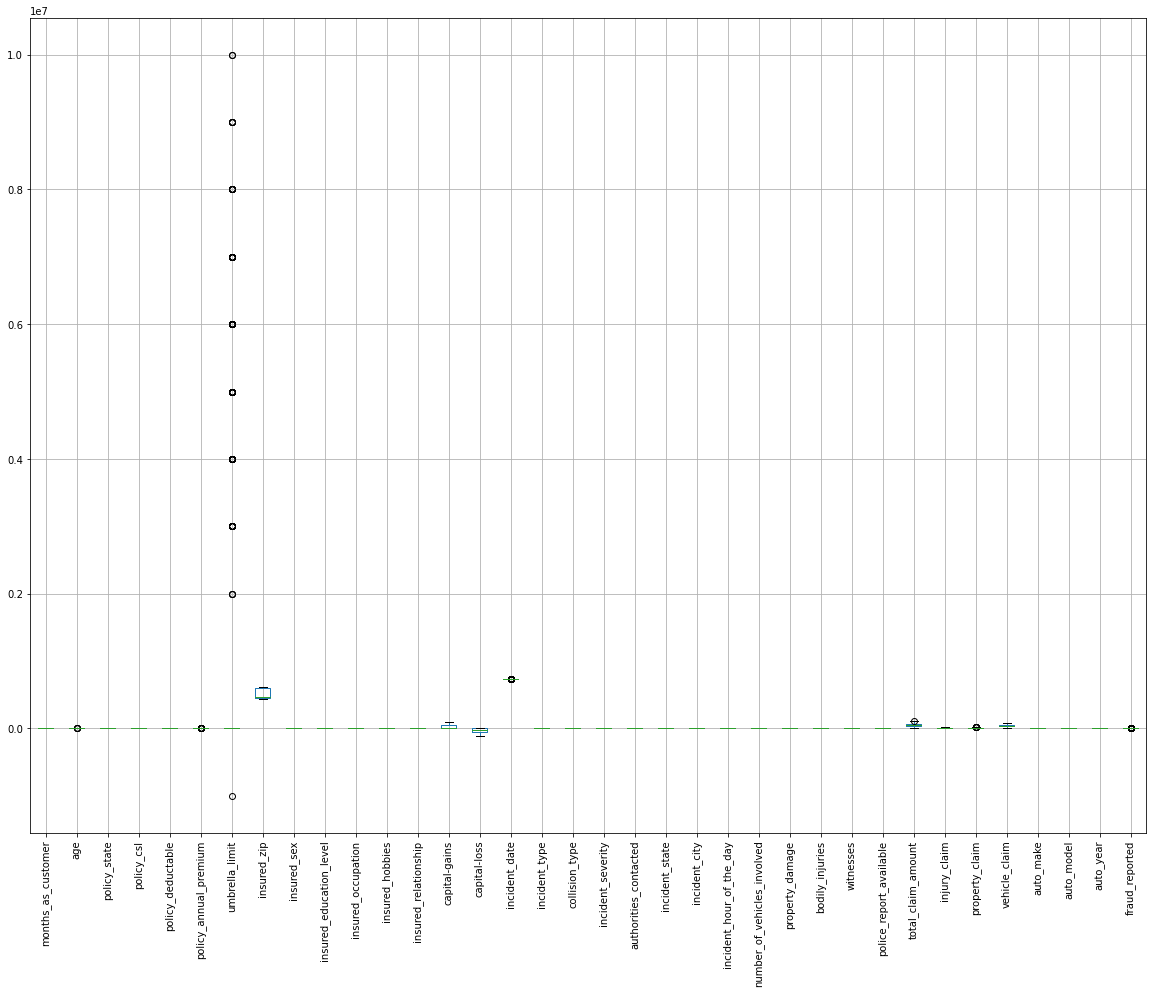

In [46]:
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
fraud.boxplot()
plt.xticks(rotation=90)

### observation
- Outliers present in umbrella-limit

#### Z-Score

In [47]:
from scipy.stats import zscore
z= np.abs(zscore(x))


In [48]:
threshold = 3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 30,  6,  6,  6,  5, 14,
        6,  6,  6], dtype=int64))


In [49]:
x = x[(z<3).all(axis=1)]
y = y[(z<3).all(axis=1)]

In [50]:
print(x.shape)
print(y.shape)

(980, 35)
(980,)


## Percentage of data loss

In [51]:
loss = (1000-980)/1000*100
print(loss)

2.0


###### Acceptable percentage

### Apply scaling

In [53]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x =scale.fit_transform(x)

- Data Scaled

# Finding the Best Random State

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = accuracy_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.8231292517006803  on Random State  503


# Test/train split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 503)

In [56]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(294, 35)
(294,)
(686, 35)
(686,)


# Finding the best algorithm

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
model =[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [59]:
for m in model:
    m.fit(x_train, y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of " ,m, " is: ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

Accuracy score of  LogisticRegression()  is: 
0.8231292517006803
[[221  17]
 [ 35  21]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       238
           1       0.55      0.38      0.45        56

    accuracy                           0.82       294
   macro avg       0.71      0.65      0.67       294
weighted avg       0.80      0.82      0.81       294



Accuracy score of  GaussianNB()  is: 
0.7380952380952381
[[182  56]
 [ 21  35]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       238
           1       0.38      0.62      0.48        56

    accuracy                           0.74       294
   macro avg       0.64      0.69      0.65       294
weighted avg       0.80      0.74      0.76       294



Accuracy score of  SVC()  is: 
0.8027210884353742
[[229   9]
 [ 49   7]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89   

In [60]:
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [61]:
cross_list = [lr,gnb,svc,dt,rf]

from sklearn.model_selection import cross_val_score
for m in cross_list:
    scr = cross_val_score(m, x, y, cv = 7)
    print("the cross validation score of  model :", scr.mean())

the cross validation score of  model : 0.7663265306122449
the cross validation score of  model : 0.7173469387755101
the cross validation score of  model : 0.746938775510204
the cross validation score of  model : 0.786734693877551
the cross validation score of  model : 0.7642857142857142


### Observation:
- The best model is decsion tree classifier and the accuracy score is 79%
- The cross val score is 79% 
- The difference is 0

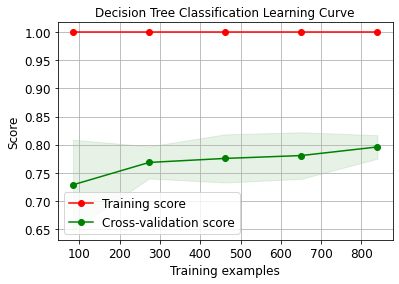

In [64]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(dt, x, y,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Decision Tree Classification Learning Curve");

# Hyper parameter tunning : Decision tree classifier

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameters = {'max_depth': np.arange(2,15),
              "criterion": ["gini","entropy"]
    
}

In [67]:
GCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

In [68]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [69]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [70]:
GCV_pred = GCV.best_estimator_.predict(x_test)

In [211]:
accuracy_score(y_test, GCV_pred)

0.8469387755102041

- The final accuracy score is 85%

# Visuvalization of decisiontreeclassifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

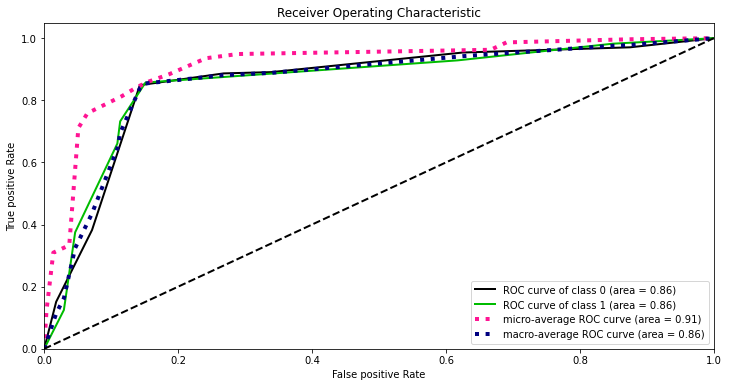

In [72]:
from sklearn.metrics import roc_curve, auc

test_prob = GCV.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, test_prob,
                       title="Digits ROC Curve", figsize=(12,6));

plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

# Saving the model

In [215]:
import joblib
joblib.dump(GCV.best_estimator_, "insurancefinal.pkl")
joblib.dump(GCV.best_estimator_, "insurancefinal.obj")

['insurancefinal.obj']

# Conculsion

In [218]:
import numpy as np
a = np.array(y_test)
predicted = np.array(GCV_pred)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con.head()

orginal  predicted
0        0          0
1        1          0
2        0          0
3        0          1
4        0          0